<a href="https://colab.research.google.com/github/widyadaridhyp/Unlocking-Online-Shopper-Behavior/blob/main/FINAL_PROJECT_SEABORN_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/widyadaridhyp/Unlocking-Online-Shopper-Behavior/main/dataset.csv')

# Data Peparation

In [ ]:
df.isnull().any()

,0
Administrative,True
Administrative_Duration,True
Informational,False
Informational_Duration,False
ProductRelated,False
ProductRelated_Duration,True
BounceRates,True
ExitRates,False
PageValues,False
SpecialDay,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  object 
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

In [ ]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [ ]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

## Perbaiki Type Data

In [ ]:
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

df['Month'] = df['Month'].map(month_mapping)
df['VisitorType'] = df['VisitorType'].map({'Other': 0, 'New_Visitor': 1, 'Returning_Visitor': 2})
df['Month'] = df['Month'].astype(int)
df['VisitorType'] = df['VisitorType'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  int64  
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

In [ ]:
#seperate numerical and categorical feature

df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(include=['object'])

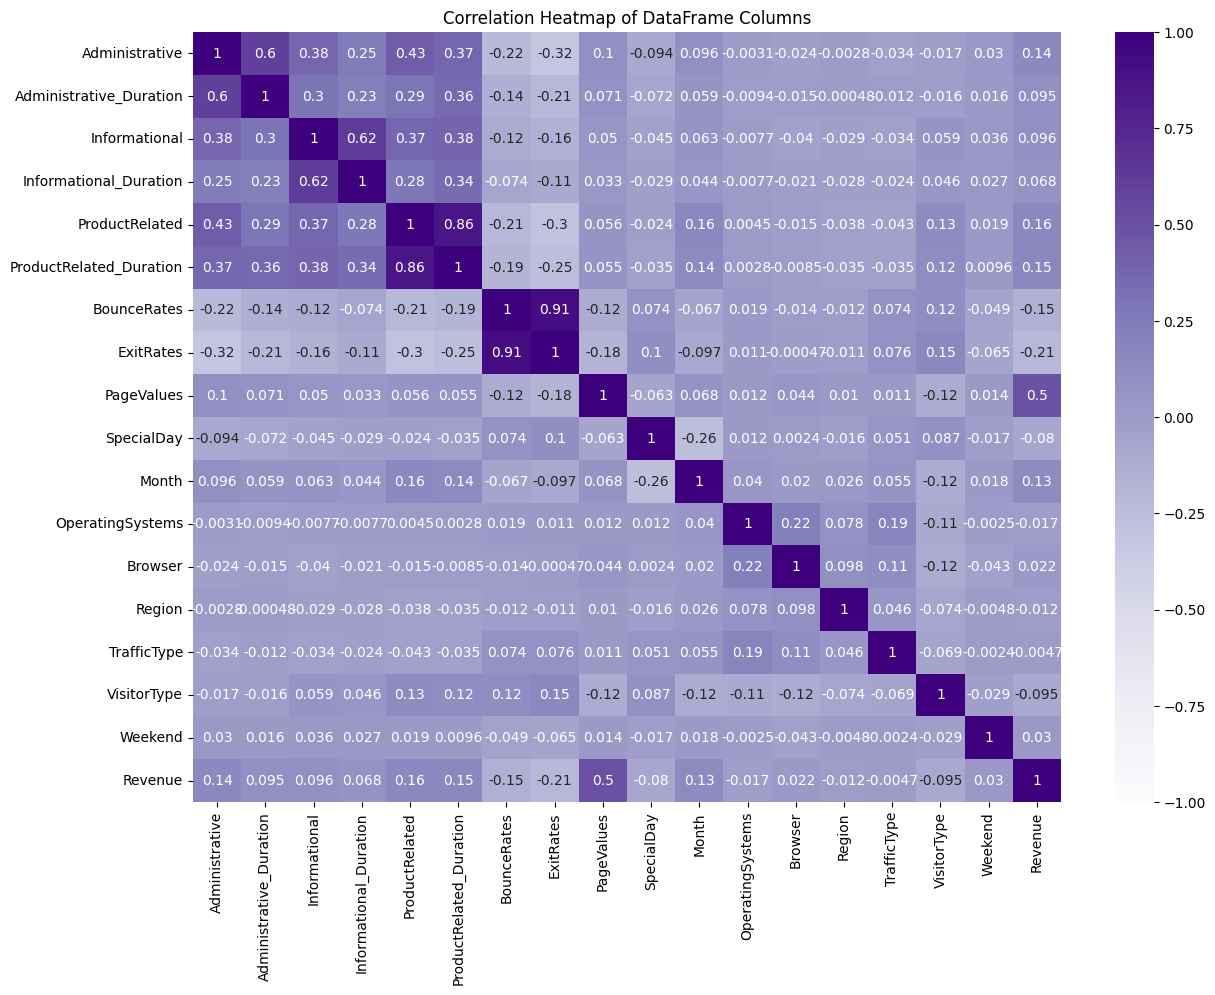

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of DataFrame Columns')
plt.show()

Page Values yang paling berkorelasi kuat dengan Revenue(peluang sesorang akan melakukan pembelian atau tidak). -> Semakin besar nilai pagevaluesnya (semakin lama sesorang melihat suatu page) maka akan semakin berpeluang orang tersebut terkonversi. Selain itu fitur Month, ProductRekatedDuraton, Product related dan administrative juga berkorelasi cukup kuat.


In [ ]:
# Rename columns with lowercase
def rename_column(col):
  return col.lower()

new_cols = [rename_column(col) for col in df.columns]

df.columns = new_cols

In [ ]:
df.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1.0,1,1,1,2,0,0
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2.0,2,1,2,2,0,0
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4.0,1,9,3,2,0,0
3,0.0,NaN,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3.0,2,2,4,2,0,0
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3.0,3,1,4,2,1,0


In [ ]:
#change the column for two word separated with '_'(underscore)
df = df.rename(columns={'productrelated': 'product_related',
                        'productrelated_duration':'product_related_duration',
                        'productrelated_duration':'product_related_duration',
                        'bouncerates':'bounce_rates',
                        'exitrates':'exit_rates',
                        'pagevalues':'page_value',
                        'specialday':'special_day',
                        'operatingsystems': 'operating_systems',
                        'traffictype': 'traffic_type',
                        'visitortype': 'visitor_type'})

# Data Prepocessing

## Handling Duplicated

In [ ]:
df.duplicated().sum()/len(df)*100

5.492043874555847

### Data Bersih - Hapus Duplikat (df)

In [ ]:
df= df.drop_duplicates()

In [ ]:
df['revenue'].value_counts()

,count
revenue,
0,10327
1,1908


## Handling Missing Value

In [ ]:
df.isnull().sum()

,0
administrative,106
administrative_duration,594
informational,0
informational_duration,0
product_related,0
product_related_duration,602
bounce_rates,69
exit_rates,0
page_value,0
special_day,0


In [ ]:
df_miss = df.isnull().sum() / len(df) * 100
df_miss = df_miss[df_miss > 0].sort_values(ascending=False)
df_miss

,0
product_related_duration,4.920311
administrative_duration,4.854924
operating_systems,4.143850
administrative,0.866367
bounce_rates,0.563956


Ada 5 fitur yang mengandung missing value

### Data Bersih - Drop Missing Value (df_no_miss)

In [ ]:
df_no_miss = df.dropna()
df_no_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10468 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            10468 non-null  float64
 1   administrative_duration   10468 non-null  float64
 2   informational             10468 non-null  int64  
 3   informational_duration    10468 non-null  float64
 4   product_related           10468 non-null  int64  
 5   product_related_duration  10468 non-null  float64
 6   bounce_rates              10468 non-null  float64
 7   exit_rates                10468 non-null  float64
 8   page_value                10468 non-null  float64
 9   special_day               10468 non-null  float64
 10  month                     10468 non-null  int64  
 11  operating_systems         10468 non-null  float64
 12  browser                   10468 non-null  int64  
 13  region                    10468 non-null  int64  
 14  traffic_typ

## Input Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12235 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12129 non-null  float64
 1   administrative_duration   11641 non-null  float64
 2   informational             12235 non-null  int64  
 3   informational_duration    12235 non-null  float64
 4   product_related           12235 non-null  int64  
 5   product_related_duration  11633 non-null  float64
 6   bounce_rates              12166 non-null  float64
 7   exit_rates                12235 non-null  float64
 8   page_value                12235 non-null  float64
 9   special_day               12235 non-null  float64
 10  month                     12235 non-null  int64  
 11  operating_systems         11728 non-null  float64
 12  browser                   12235 non-null  int64  
 13  region                    12235 non-null  int64  
 14  traffic_typ

In [ ]:
#drop the Null for administrative and bounced rate
df_input_miss = df.dropna(subset=['administrative', 'bounce_rates'])

In [ ]:
df_input_miss.isnull().sum()

,0
administrative,0
administrative_duration,581
informational,0
informational_duration,0
product_related,0
product_related_duration,595
bounce_rates,0
exit_rates,0
page_value,0
special_day,0


Untuk  sisa dari missing value pada fitur **administrative duration** dan **product related duration** akan dilakukan pengisian dengan asumsi:

- **product related duration** = product related * 120  
- **administrative duration** = admnistrative * 120

hal ini diasumsikan, untuk setiap page yang dikunjungi memiliki waktu selama 120 detik atau 2 menit.

untuk fitur **operating systems** akan di drop.

In [ ]:
# to fill Null value on administrative_duration
df_input_miss.loc[df['administrative_duration'].isnull(), 'administrative_duration'] = df['administrative'] * 120

In [ ]:
# to fill Null value on product_related_duration
df_input_miss.loc[(df['product_related_duration'].isnull()),'product_related_duration'] = df['product_related'] * 120

In [ ]:
# Mengisi nilai NaN pada kolom operating_system dengan modus
df_input_miss.loc[df_input_miss['operating_systems'].isnull(), 'operating_systems'] = df_input_miss['operating_systems'].mode()[0]

### Data Bersih - Input Missing Value (df_input_miss)

In [ ]:
df_input_miss.isnull().sum()

,0
administrative,0
administrative_duration,0
informational,0
informational_duration,0
product_related,0
product_related_duration,0
bounce_rates,0
exit_rates,0
page_value,0
special_day,0


In [ ]:
df_input_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12061 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12061 non-null  float64
 1   administrative_duration   12061 non-null  float64
 2   informational             12061 non-null  int64  
 3   informational_duration    12061 non-null  float64
 4   product_related           12061 non-null  int64  
 5   product_related_duration  12061 non-null  float64
 6   bounce_rates              12061 non-null  float64
 7   exit_rates                12061 non-null  float64
 8   page_value                12061 non-null  float64
 9   special_day               12061 non-null  float64
 10  month                     12061 non-null  int64  
 11  operating_systems         12061 non-null  float64
 12  browser                   12061 non-null  int64  
 13  region                    12061 non-null  int64  
 14  traffic_typ

## Handling Outliers

In [ ]:
category = ['special_day', 'month', 'operating_systems', 'browser', 'region', 'traffic_type', 'visitor_type', 'weekend', 'revenue']
numeric = ['administrative','administrative_duration', 'informational', 'informational_duration', 'product_related',
           'product_related_duration', 'bounce_rates', 'exit_rates', 'page_value']

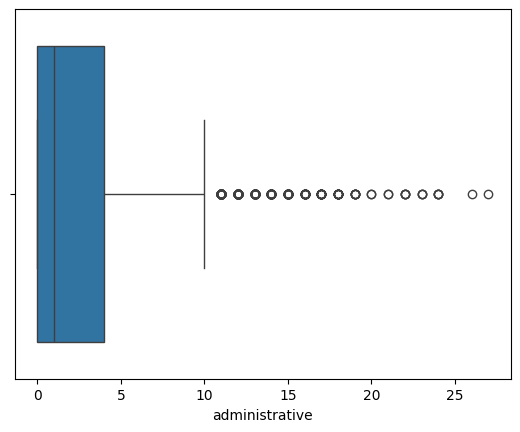

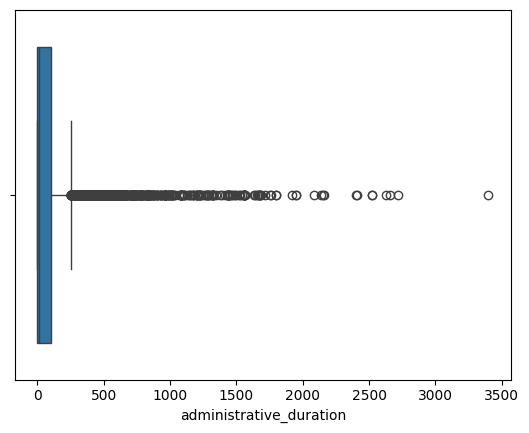

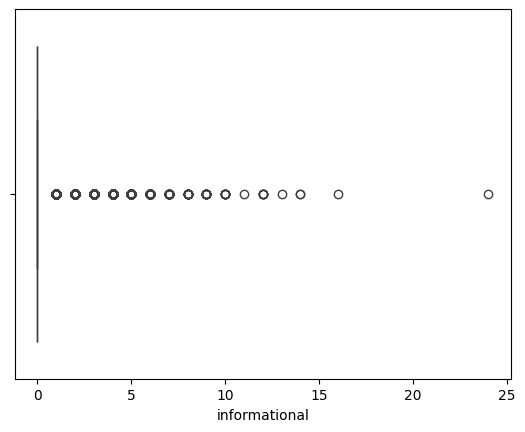

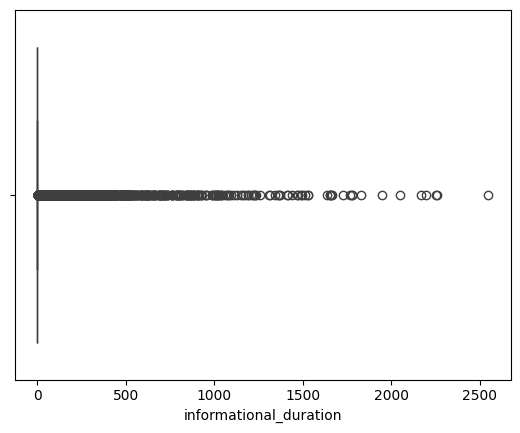

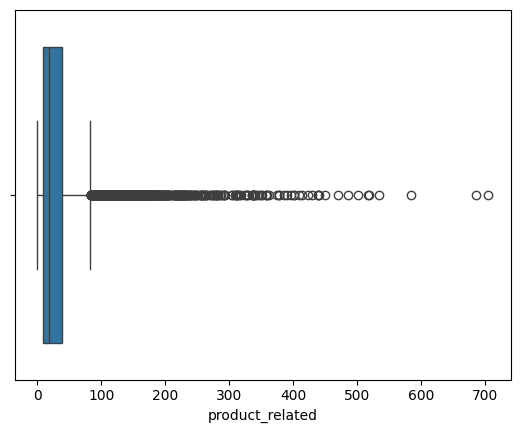

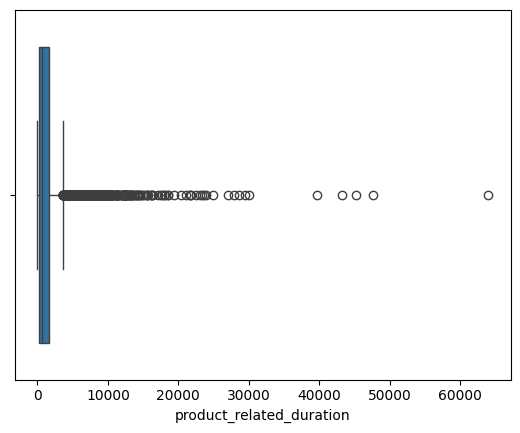

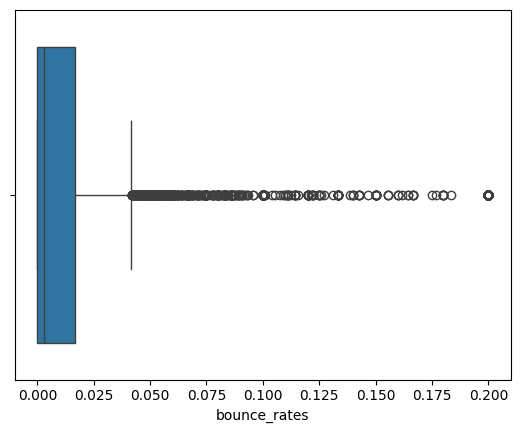

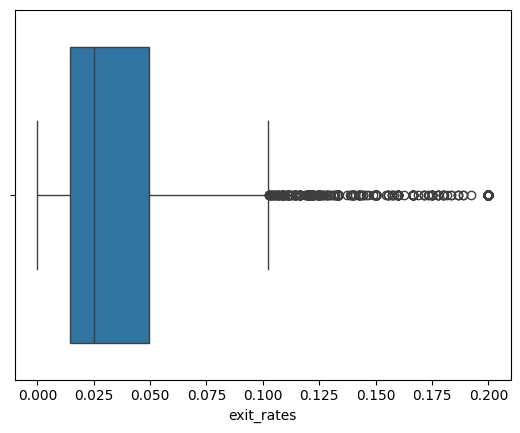

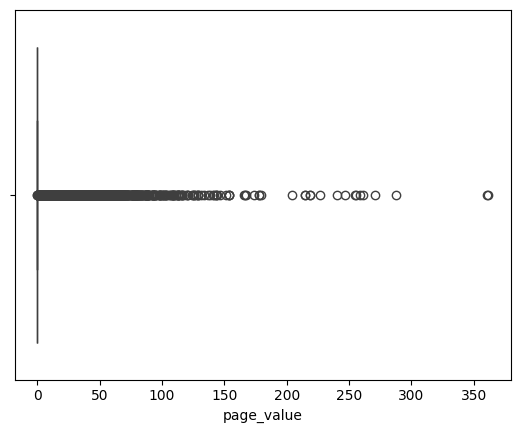

In [ ]:
for i in df_input_miss[numeric].columns:
    sns.boxplot(data=df_input_miss[numeric], x=i)
    plt.show()

### Remove Outlier di Beberapa Fitur (df_no_outliers)

In [ ]:
#outliers of bounce_rates column
Q1_bounce_rates = df_input_miss['bounce_rates'].quantile(0.25)
Q3_bounce_rates = df_input_miss['bounce_rates'].quantile(0.75)
IQR_bounce_rates = Q3_bounce_rates - Q1_bounce_rates
lower_bound_br = Q1_bounce_rates - 1.5 * IQR_bounce_rates
upper_bound_br = Q3_bounce_rates + 1.5 * IQR_bounce_rates

#outliers of exit_rates column
Q1_exit_rates = df_input_miss['exit_rates'].quantile(0.25)
Q3_exit_rates = df_input_miss['exit_rates'].quantile(0.75)
IQR_exit_rates = Q3_exit_rates - Q1_exit_rates
lower_bound_er = Q1_exit_rates - 1.5 * IQR_exit_rates
upper_bound_er = Q3_exit_rates + 1.5 * IQR_exit_rates

In [ ]:
#check the percentage of total rows and outliers rows in bounce rates column
rate_outlier_bounced = df_input_miss[(df_input_miss['bounce_rates']<=lower_bound_br) | (df_input_miss['bounce_rates']>=upper_bound_br)]['bounce_rates'].count()/df_input_miss['bounce_rates'].count()
rate_outlier_bounced

0.1193101732857972

In [ ]:
#check the percentage of total rows and outliers rows in exit rates column
rate_outlier_exit = df_input_miss[(df_input_miss['exit_rates']<=lower_bound_er) | (df_input_miss['exit_rates']>=upper_bound_er)]['exit_rates'].count()/df_input_miss['product_related'].count()
rate_outlier_exit

0.08249730536439764

In [ ]:
# Hapus outliers bounce rate menggunakan batas bawah dan atas yang telah dihitung
#df_cleaned_filtered =df_no_outliers = df[(df['bounce_rates'] >= lower_bound_br) & (df['bounce_rates'] <= upper_bound_br)]

# Hapus outliers exit rate menggunakan batas bawah dan atas yang telah dihitung
df_no_outliers = df_input_miss[(df_input_miss['exit_rates'] >= lower_bound_br) & (df_input_miss['exit_rates'] <= upper_bound_br)]

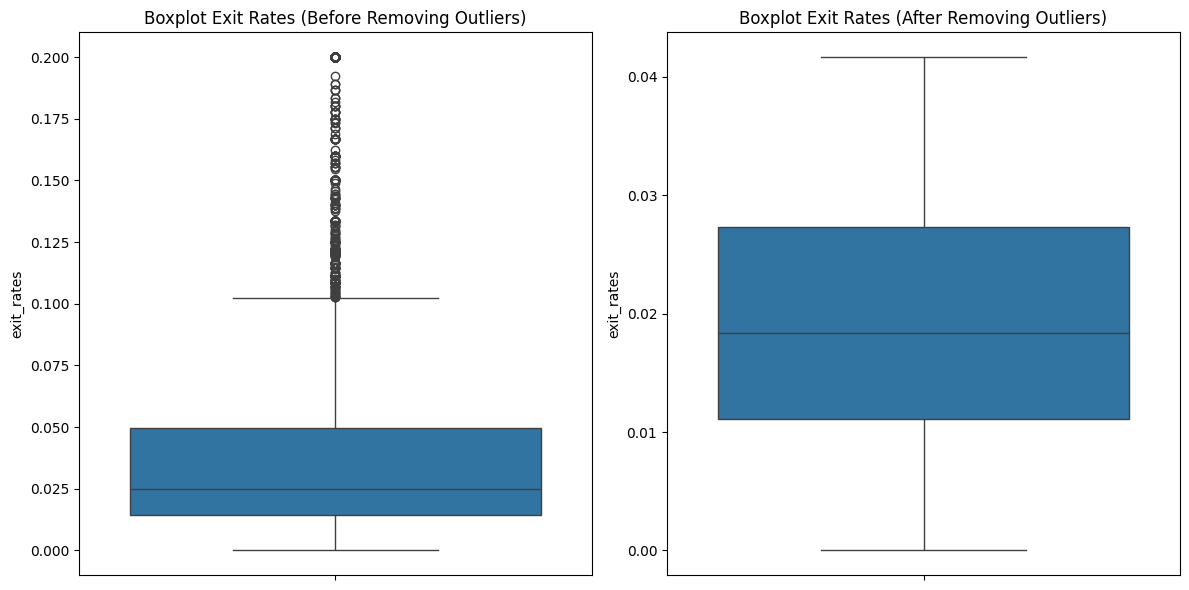

In [ ]:
# Plot boxplot sebelum dan sesudah menghapus outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_input_miss['exit_rates'])
plt.title('Boxplot Exit Rates (Before Removing Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_no_outliers['exit_rates'])
plt.title('Boxplot Exit Rates (After Removing Outliers)')

plt.tight_layout()
plt.show()

In [ ]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8555 entries, 5 to 12328
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            8555 non-null   float64
 1   administrative_duration   8555 non-null   float64
 2   informational             8555 non-null   int64  
 3   informational_duration    8555 non-null   float64
 4   product_related           8555 non-null   int64  
 5   product_related_duration  8555 non-null   float64
 6   bounce_rates              8555 non-null   float64
 7   exit_rates                8555 non-null   float64
 8   page_value                8555 non-null   float64
 9   special_day               8555 non-null   float64
 10  month                     8555 non-null   int64  
 11  operating_systems         8555 non-null   float64
 12  browser                   8555 non-null   int64  
 13  region                    8555 non-null   int64  
 14  traffic_type

## Feature Transformation

In [ ]:
scaler = StandardScaler()

In [ ]:
dts= df_input_miss.copy()

In [ ]:
X = dts.drop('revenue', axis=1)
y = dts['revenue']

X_train, X_test, y_train_scaled, y_test_scaled= train_test_split(X, y, test_size=0.2, random_state=42)

# Fit dan transform data training
X_train_scaled = scaler.fit_transform(X_train)

# Transform data testing dengan scaler yang sudah di-fit
X_test_scaled = scaler.transform(X_test)

# Mengubah kembali menjadi DataFrame
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train_scaled.head()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_value,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend
0,-0.699034,-0.456359,-0.397576,-0.244845,-0.406960,0.008081,-0.454788,-0.568223,2.743607,2.727433,-0.791140,2.115118,-0.789703,-0.059584,-0.026015,-2.259905,-0.548928
1,-0.699034,-0.456359,-0.397576,-0.244845,-0.653754,-0.619762,3.860375,3.357362,-0.314389,-0.307079,0.981484,-0.130951,2.689847,-0.476455,-0.764225,0.398418,-0.548928
2,0.205429,0.139258,-0.397576,-0.244845,0.669957,0.331964,-0.341930,-0.495296,-0.314389,-0.307079,0.390609,0.992084,-0.209778,1.191030,-0.026015,0.398418,-0.548928
3,-0.699034,-0.456359,-0.397576,-0.244845,-0.496703,-0.439475,-0.454788,-0.422831,-0.314389,-0.307079,1.276921,-0.130951,-0.209778,-0.059584,-0.518155,-2.259905,1.821733
4,-0.699034,-0.456359,-0.397576,-0.244845,-0.653754,-0.434792,-0.454788,0.522217,-0.314389,-0.307079,-1.677451,-1.253985,-0.789703,-0.059584,-0.272085,0.398418,-0.548928


### Data Terscaling (dt_input_miss) -> di scaling (X_train_scaled, X_test_scaled)

In [ ]:
X_train_scaled.describe()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_value,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend
count,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03
mean,-7.364664e-19,5.854907e-17,6.333611e-17,-6.996430e-17,6.591374e-17,-2.393516e-17,4.345151e-17,1.089970e-16,1.031053e-17,-5.155264e-18,1.406651e-16,-5.597144e-17,-2.135752e-17,5.965377e-17,-3.682332e-18,-3.682332e-18,-1.472933e-18
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-6.990342e-01,-4.563590e-01,-3.975764e-01,-2.448449e-01,-7.210612e-01,-6.197621e-01,-4.547878e-01,-8.953553e-01,-3.143886e-01,-3.070786e-01,-1.677451e+00,-1.253985e+00,-7.897031e-01,-8.933268e-01,-7.642250e-01,-4.918229e+00,-5.489279e-01
25%,-6.990342e-01,-4.563590e-01,-3.975764e-01,-2.448449e-01,-5.415749e-01,-5.253456e-01,-4.547878e-01,-5.919899e-01,-3.143886e-01,-3.070786e-01,-7.911397e-01,-1.309508e-01,-2.097780e-01,-8.933268e-01,-5.181550e-01,3.984179e-01,-5.489279e-01
50%,-3.975464e-01,-4.083253e-01,-3.975764e-01,-2.448449e-01,-3.172171e-01,-3.150304e-01,-3.892410e-01,-3.637656e-01,-3.143886e-01,-3.070786e-01,9.517194e-02,-1.309508e-01,-2.097780e-01,-5.958393e-02,-5.181550e-01,3.984179e-01,-5.489279e-01
75%,5.069170e-01,4.520297e-02,-3.975764e-01,-2.448449e-01,1.314986e-01,1.282610e-01,-9.519094e-02,1.678240e-01,-3.143886e-01,-3.070786e-01,9.814836e-01,-1.309508e-01,-2.097780e-01,3.572875e-01,-2.601487e-02,3.984179e-01,-5.489279e-01
max,7.441136e+00,1.329896e+01,1.205385e+01,1.536080e+01,1.466989e+01,2.056512e+01,3.860375e+00,3.357362e+00,1.889541e+01,4.750440e+00,1.276921e+00,6.607255e+00,6.169398e+00,2.441645e+00,3.911106e+00,3.984179e-01,1.821733e+00


In [ ]:
X_test_scaled.describe()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_value,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend
count,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000
mean,0.018764,0.004661,-0.006696,-0.017196,-0.016161,-0.004370,-0.029157,-0.026205,0.006103,0.025338,-0.023591,0.001691,-0.006456,0.014185,-0.035601,-0.024622,0.017948
std,1.015905,1.013225,0.968174,0.893788,1.016391,1.241046,0.966587,0.971178,0.957102,1.038893,1.001842,0.954762,0.961290,1.005674,0.949731,1.002299,1.011408
min,-0.699034,-0.456359,-0.397576,-0.244845,-0.721061,-0.619762,-0.454788,-0.895355,-0.314389,-0.307079,-1.677451,-1.253985,-0.789703,-0.893327,-0.764225,-4.918229,-0.548928
25%,-0.699034,-0.456359,-0.397576,-0.244845,-0.564011,-0.520058,-0.454788,-0.594254,-0.314389,-0.307079,-0.791140,-0.130951,-0.209778,-0.893327,-0.518155,0.398418,-0.548928
50%,-0.397546,-0.413382,-0.397576,-0.244845,-0.294781,-0.327264,-0.399730,-0.363766,-0.314389,-0.307079,-0.200265,-0.130951,-0.209778,-0.059584,-0.518155,0.398418,-0.548928
75%,0.506917,0.089708,-0.397576,-0.244845,0.109063,0.088519,-0.122852,0.077489,-0.314389,-0.307079,0.981484,0.992084,-0.209778,0.357288,-0.026015,0.398418,-0.548928
max,6.235185,16.728314,18.279561,17.383029,15.096167,29.337612,3.860375,3.357362,14.976075,4.750440,1.276921,6.607255,6.169398,2.441645,3.911106,0.398418,1.821733


## Feature Selection: Categorical Data Analysis



Sebelum dilakukan encoding, ingin dicek terlebih dahulu signifikansi variabel independen kategorik terhadap variabel dependen dengan Uji Chi-Square

**Hipotesis:**
* $H_o$: $p_{value}>\alpha$ (Tidak ada hubungan antara variabel independen dan variabel kategorik)
* $H_1$: $p_{value}<\alpha$ (Terdapat hubungan antara variabel independen kategorik dan variabel dependen)

### Hubungan visitor_type dengan revenue

In [ ]:
dt2 = df_input_miss.copy()

In [ ]:
X = dt2.drop('revenue', axis=1)
y = dt2['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12061 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12061 non-null  float64
 1   administrative_duration   12061 non-null  float64
 2   informational             12061 non-null  int64  
 3   informational_duration    12061 non-null  float64
 4   product_related           12061 non-null  int64  
 5   product_related_duration  12061 non-null  float64
 6   bounce_rates              12061 non-null  float64
 7   exit_rates                12061 non-null  float64
 8   page_value                12061 non-null  float64
 9   special_day               12061 non-null  float64
 10  month                     12061 non-null  int64  
 11  operating_systems         12061 non-null  float64
 12  browser                   12061 non-null  int64  
 13  region                    12061 non-null  int64  
 14  traffic_typ

In [ ]:
df_visit = pd.concat([dt2.visitor_type, y_train], axis=1)
tabel_kontingensi_visitor = df_visit.groupby(['visitor_type', 'revenue']).size().unstack()
tabel_kontingensi_visitor

revenue,0.0,1.0
visitor_type,,
0,54,14
1,988,322
2,7118,1152


In [ ]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_visitor)
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 99.73738098107161
P-Value: 2.199393312599217e-22
Degrees of Freedom: 2
Expected Frequencies:
[[  57.51243781   10.48756219]
 [1107.960199    202.039801  ]
 [6994.52736318 1275.47263682]]


### Hubungan special_day dengan revenue

In [ ]:
df_spec_rev = pd.concat([dt2.special_day, y_train], axis=1)
tabel_kontingensi_special_day = df_spec_rev.groupby(['special_day','revenue']).size().unstack(fill_value=0)
tabel_kontingensi_special_day

revenue,0.0,1.0
special_day,,
0.0,7250,1429
0.2,123,10
0.4,190,10
0.6,246,25
0.8,235,7
1.0,116,7


In [ ]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_special_day)
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 76.2923828406801
P-Value: 4.998308173340676e-15
Degrees of Freedom: 5
Expected Frequencies:
[[7340.44776119 1338.55223881]
 [ 112.48756219   20.51243781]
 [ 169.15422886   30.84577114]
 [ 229.2039801    41.7960199 ]
 [ 204.67661692   37.32338308]
 [ 104.02985075   18.97014925]]


### Hubungan region dengan revenue

In [ ]:
df_reg_rev = pd.concat([dt2.region, y_train], axis=1)
tabel_kontingensi_region = df_reg_rev.groupby(['region','revenue']).size().unstack(fill_value=0)
tabel_kontingensi_region

revenue,0.0,1.0
region,,
1,3143,609
2,739,138
3,1619,270
4,779,143
5,206,37
6,551,87
7,499,94
8,291,47
9,333,63


In [ ]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_region)
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 6.119212478852255
P-Value: 0.6338802087345337
Degrees of Freedom: 8
Expected Frequencies:
[[3173.33333333  578.66666667]
 [ 741.74129353  135.25870647]
 [1597.66169154  291.33830846]
 [ 779.80099502  142.19900498]
 [ 205.52238806   37.47761194]
 [ 539.60199005   98.39800995]
 [ 501.54228856   91.45771144]
 [ 285.87064677   52.12935323]
 [ 334.92537313   61.07462687]]


### Hubungan traffic_type dengan revenue

In [ ]:
df_traf_rev = pd.concat([dt2.traffic_type, y_train], axis=1)
tabel_kontingensi_traffic = df_traf_rev.groupby(['traffic_type','revenue']).size().unstack(fill_value=0)
tabel_kontingensi_traffic

revenue,0.0,1.0
traffic_type,,
1,1704,201
2,2417,650
3,1436,136
4,712,133
5,156,47
6,311,38
7,21,10
8,198,71
9,32,2


In [ ]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_traffic)
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 297.8156574004317
P-Value: 5.6063403145322514e-52
Degrees of Freedom: 19
Expected Frequencies:
[[1.61119403e+03 2.93805970e+02]
 [2.59398010e+03 4.73019900e+02]
 [1.32955224e+03 2.42447761e+02]
 [7.14676617e+02 1.30323383e+02]
 [1.71691542e+02 3.13084577e+01]
 [2.95174129e+02 5.38258706e+01]
 [2.62189055e+01 4.78109453e+00]
 [2.27512438e+02 4.14875622e+01]
 [2.87562189e+01 5.24378109e+00]
 [3.12089552e+02 5.69104478e+01]
 [1.68308458e+02 3.06915423e+01]
 [8.45771144e-01 1.54228856e-01]
 [4.86318408e+02 8.86815920e+01]
 [9.30348259e+00 1.69651741e+00]
 [2.53731343e+01 4.62686567e+00]
 [1.69154229e+00 3.08457711e-01]
 [8.45771144e-01 1.54228856e-01]
 [5.92039801e+00 1.07960199e+00]
 [1.01492537e+01 1.85074627e+00]
 [1.40398010e+02 2.56019900e+01]]


### Hubungan month dengan revenue

In [ ]:
df_month_rev = pd.concat([dt2.month, y_train], axis=1)
tabel_kontingensi_month = df_month_rev.groupby(['month','revenue']).size().unstack(fill_value=0)
tabel_kontingensi_month

revenue,0.0,1.0
month,,
2,134,1
3,1319,159
5,2331,280
6,196,26
7,293,53
8,290,60
9,299,68
10,334,96
11,1766,582


In [ ]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_month)
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 282.9614239112374
P-Value: 1.0673423971438136e-55
Degrees of Freedom: 9
Expected Frequencies:
[[ 114.17910448   20.82089552]
 [1250.04975124  227.95024876]
 [2208.30845771  402.69154229]
 [ 187.76119403   34.23880597]
 [ 292.63681592   53.36318408]
 [ 296.0199005    53.9800995 ]
 [ 310.39800995   56.60199005]
 [ 363.68159204   66.31840796]
 [1985.87064677  362.12935323]
 [1151.09452736  209.90547264]]


## Feature Engineering

### Feature Extraction

- total_visits = untuk melihat total visit pada dari seluruh page
- total_duration = untuk melihat total durasi dari seluruh visits
- visit_bounce_rates = untuk mengetahui nilai bounce dari total visits
- visit_exit_rates = untuk mengetahui nilai exit dari total visits
- special_day_visits = untuk mengetahui nilai bobot dari visits saat special day
- special_day_duration = untuk mengethaui nilai bobot dari duration saat special day

In [ ]:
#total visits to check the total visits for every user
dt2['total_visits'] = dt2['administrative'] + dt2['informational'] + dt2['product_related']

# total duration to check the total duration spent for every user
dt2['total_duration'] = dt2['administrative_duration'] + dt2['informational_duration'] + dt2['product_related_duration']

# visit bounce rates
dt2['visit_bounce_rates'] = dt2['bounce_rates'] * dt2['total_visits']

# visit exit rates
dt2['visit_exit_rates'] = dt2['exit_rates'] * dt2['total_visits']


#special day weighted on total visits and total duration
dt2['special_day_visits'] = dt2['special_day'] * dt2['total_visits']
dt2['special_day_duration'] = dt2['special_day'] * dt2['total_duration']

In [ ]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12061 entries, 0 to 12329
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12061 non-null  float64
 1   administrative_duration   12061 non-null  float64
 2   informational             12061 non-null  int64  
 3   informational_duration    12061 non-null  float64
 4   product_related           12061 non-null  int64  
 5   product_related_duration  12061 non-null  float64
 6   bounce_rates              12061 non-null  float64
 7   exit_rates                12061 non-null  float64
 8   page_value                12061 non-null  float64
 9   special_day               12061 non-null  float64
 10  month                     12061 non-null  int64  
 11  operating_systems         12061 non-null  float64
 12  browser                   12061 non-null  int64  
 13  region                    12061 non-null  int64  
 14  traffic_typ

### **ANOVA:** Feature Selection Numerik (Independent) terhadap Kategorik (Dependent) secara Linear

**Hipotesis:**
* $H_0$:$\mu_1 = \mu_2 =\mu_i$ (Semua rata-ata group populasi sama / tidak ada perbedaan signifikan)
* $H_1$: Setidaknya terdapat satu $\mu$ yang berbeda

**Aturan Penolakan $H_0$:**
* $H_0$ ditolak jika $p_{value} <= \alpha (0,05$)




In [ ]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12061 entries, 0 to 12329
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12061 non-null  float64
 1   administrative_duration   12061 non-null  float64
 2   informational             12061 non-null  int64  
 3   informational_duration    12061 non-null  float64
 4   product_related           12061 non-null  int64  
 5   product_related_duration  12061 non-null  float64
 6   bounce_rates              12061 non-null  float64
 7   exit_rates                12061 non-null  float64
 8   page_value                12061 non-null  float64
 9   special_day               12061 non-null  float64
 10  month                     12061 non-null  int64  
 11  operating_systems         12061 non-null  float64
 12  browser                   12061 non-null  int64  
 13  region                    12061 non-null  int64  
 14  traffic_typ

In [ ]:
num = ['administrative',
       'administrative_duration',
       'informational',
       'informational_duration',
       'product_related',
       'product_related_duration',
       'bounce_rates',
       'exit_rates',
       'page_value',
       'total_visits',
       'total_duration',
       'visit_bounce_rates',
       'visit_exit_rates',
       'special_day_visits',
       'special_day_duration']

In [ ]:
revenue = dt2['revenue']

In [ ]:
print(dt2[num].shape)
print(revenue.shape)

(12061, 15)
(12061,)


In [ ]:
F, p = f_classif(dt2[num], revenue)

In [ ]:
p

array([2.00107237e-052, 3.74855480e-023, 4.58831755e-025, 8.55818285e-014,
       1.76473271e-067, 1.45024892e-053, 8.74469503e-059, 2.63581589e-115,
       0.00000000e+000, 2.82417839e-072, 3.91256327e-057, 3.32017555e-004,
       1.33321964e-003, 1.11474177e-006, 1.56846643e-004])

In [ ]:

for i, col in enumerate(dt2[num]):
  print(f"Fitur: {col}")
  print(f"  Nilai F-statistic: {F[i]}")
  print(f"  Nilai p-value: {p[i]}\n")
  if p[i] <= 0.05:
    print(f"{col} memiliki pengaruh signifikan terhadap data.\n")
  else:
    print(f"{col} tidak memiliki pengaruh signifikan terhadap data.\n")

Fitur: administrative
  Nilai F-statistic: 234.43314272785716
  Nilai p-value: 2.0010723709159595e-52

administrative memiliki pengaruh signifikan terhadap data.

Fitur: administrative_duration
  Nilai F-statistic: 98.62270681050111
  Nilai p-value: 3.748554804207877e-23

administrative_duration memiliki pengaruh signifikan terhadap data.

Fitur: informational
  Nilai F-statistic: 107.42014393943086
  Nilai p-value: 4.588317545238355e-25

informational memiliki pengaruh signifikan terhadap data.

Fitur: informational_duration
  Nilai F-statistic: 55.8041191581484
  Nilai p-value: 8.558182848748795e-14

informational_duration memiliki pengaruh signifikan terhadap data.

Fitur: product_related
  Nilai F-statistic: 305.051295583732
  Nilai p-value: 1.764732713965997e-67

product_related memiliki pengaruh signifikan terhadap data.

Fitur: product_related_duration
  Nilai F-statistic: 239.76312179210854
  Nilai p-value: 1.4502489163140206e-53

product_related_duration memiliki pengaruh sign

# Penyeimbangan Data

In [ ]:
dts

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_value,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1.0,1,1,1,2,0,0
1,0.0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2.0,2,1,2,2,0,0
2,0.0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4.0,1,9,3,2,0,0
3,0.0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3.0,2,2,4,2,0,0
4,0.0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3.0,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4.0,6,1,1,2,1,0
12326,0.0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3.0,2,1,8,2,1,0
12327,0.0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3.0,2,1,13,2,1,0
12328,4.0,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2.0,2,3,11,2,0,0


In [ ]:
#dt3.info()

In [ ]:
#dt3['revenue'].value_counts()

### Penyeimbangan Data - Menggunakan SMOTE (

In [ ]:
X = dts.drop(columns=['revenue'])
y = dts['revenue']

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
smote_50_50 = SMOTE(sampling_strategy=1.0, random_state=42)  # 50:50 balance
smote_50_40 = SMOTE(sampling_strategy=0.8, random_state=42)  # 50:40 balance
smote_50_35 = SMOTE(sampling_strategy=0.7, random_state=42)  # 50:35 balance
smote_50_30 = SMOTE(sampling_strategy=0.6, random_state=42)  # 50:30 balance
smote_50_20 = SMOTE(sampling_strategy=0.4, random_state=42)  # 50:20 balance
smote_50_25 = SMOTE(sampling_strategy=0.5, random_state=42)  # 50:25 balance

X_resampled_50_50, y_resampled_50_50 = smote_50_50.fit_resample(X_train, y_train)
X_resampled_50_40, y_resampled_50_40 = smote_50_40.fit_resample(X_train, y_train)
X_resampled_50_35, y_resampled_50_35 = smote_50_35.fit_resample(X_train, y_train)
X_resampled_50_30, y_resampled_50_30 = smote_50_30.fit_resample(X_train, y_train)
X_resampled_50_20, y_resampled_50_20 = smote_50_20.fit_resample(X_train, y_train)
X_resampled_50_25, y_resampled_50_25 = smote_50_25.fit_resample(X_train, y_train)

# Check the distribution of the target variable after resampling
print('50:50 balance:', pd.Series(y_resampled_50_50).value_counts())
print('50:40 balance:', pd.Series(y_resampled_50_40).value_counts())
print('50:35 balance:', pd.Series(y_resampled_50_35).value_counts())
print('50:30 balance:', pd.Series(y_resampled_50_30).value_counts())
print('50:20 balance:', pd.Series(y_resampled_50_20).value_counts())
print('50:25 balance:', pd.Series(y_resampled_50_25).value_counts())

50:50 balance: revenue
0    8142
1    8142
Name: count, dtype: int64
50:40 balance: revenue
0    8142
1    6513
Name: count, dtype: int64
50:35 balance: revenue
0    8142
1    5699
Name: count, dtype: int64
50:30 balance: revenue
0    8142
1    4885
Name: count, dtype: int64
50:20 balance: revenue
0    8142
1    3256
Name: count, dtype: int64
50:25 balance: revenue
0    8142
1    4071
Name: count, dtype: int64


# Penentuan Metric

Metric yang akan difokuskan pada proses modeling ini adalah pada metric **recall** hal ini dikarenakan tujuan untuk mememinimalisir false negative dari prediksi nilai conversion rate.

# Evaluation Function

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def eval_classification(model, X_test, y_test, X_train, y_train, X, Y):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #
def crossval(model, X, y):
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
from sklearn.inspection import permutation_importance

def show_feature_importance_NB(model, X, y):
    # Calculate permutation importance
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    feat_importances = pd.Series(result.importances_mean, index=X.columns)

    # Sort feature importances from largest to smallest
    sorted_feat_importances = feat_importances.sort_values(ascending=False)

    # Plot the top 25 features
    ax = sorted_feat_importances.head(25).plot(kind='barh', figsize=(10, 8), color='#018fa6')
    ax.invert_yaxis()

    # Add value annotations
    for index, value in enumerate(sorted_feat_importances.head(25)):
        ax.text(value, index, f'{value:.4f}', va='center', ha='left', fontsize=10, color='black')

    # Set labels and title
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance (Permutation)')

    plt.show()


In [ ]:
def show_feature_importance(model, X):
    # Calculate feature importances
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)

    # Sort feature importances from largest to smallest
    sorted_feat_importances = feat_importances.sort_values(ascending=False)

    # Plot the top 25 features
    ax = sorted_feat_importances.head(25).plot(kind='barh', figsize=(10, 8), color='#018fa6')
    ax.invert_yaxis()

    # Add value annotations
    for index, value in enumerate(sorted_feat_importances.head(25)):
        ax.text(value, index, f'{value:.4f}', va='center')

    # Set labels and title
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

    plt.show()

# Modelling 1 (Data murni)

***Hanya*** menggunakan raw data -> Namun raw data yang sudah dihapus duplikat dan missing valuenya untuk setiap fitur.

In [ ]:
X_1 = df_no_miss.drop('revenue', axis=1).copy()
y_1 = df_no_miss['revenue'].copy()

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg1 = XGBClassifier()
xg1.fit(X_1_train, y_1_train)
eval_classification(xg1, X_1_test, y_1_test, X_1_train, y_1_train, X_1, y_1)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 0.99
Precision (Test Set): 0.71
Recall (Test Set): 0.60
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00


In [ ]:
crossval(xg1,X_1,y_1)

recall (crossval train): 0.9496311064734975
recall (crossval test): 0.5594399926314819


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xg1, X_1_train, y_1_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.89731343 0.89373134 0.89373134 0.8919403  0.89187575]
Mean CV Score: 0.8937184329249808


**Overfitting**: Tingginya recall pada training (0.95) dibandingkan dengan recall pada test yang lebih rendah (0.60) menunjukkan bahwa model mengalami overfitting. Model ini dapat menangkap hampir semua kasus positif dalam data training tetapi kesulitan untuk menggeneralisasi ke data baru.

**Kinerja Berfokus pada Recall**: Dengan recall pada test sebesar 0.60, model ini menangkap bagian yang cukup dari kasus positif tetapi masih melewatkan sejumlah yang signifikan. Memperbaiki recall lebih lanjut harus menjadi prioritas. Namun perlu dilihat bahwa model mengalami overfitting.

**Kemampuan Diskriminatif yang Kuat**: Tingginya ROC AUC menunjukkan bahwa model memiliki kemampuan diskriminatif yang kuat, tetapi hal ini tidak sepenuhnya diterjemahkan ke dalam recall yang lebih tinggi pada data test karena overfitting.

## Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
xtc1 = ExtraTreesClassifier(random_state=42)
xtc1.fit(X_1_train, y_1_train)
eval_classification(xtc1, X_1_test, y_1_test, X_1_train, y_1_train, X_1, y_1)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 1.00
Precision (Test Set): 0.79
Recall (Test Set): 0.50
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00


In [ ]:
crossval(xtc1, X_1, y_1)

recall (crossval train): 1.0
recall (crossval test): 0.47632495164410066


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc1, X_1_train, y_1_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.89671642 0.89432836 0.90029851 0.89074627 0.88410992]
Mean CV Score: 0.8932398937213574


**Overfitting**: Recall pada training yang sempurna (1.0) dibandingkan dengan recall pada test yang jauh lebih rendah (0.50) menunjukkan overfitting yang signifikan. Model ini dapat mengidentifikasi semua kasus positif dalam training tetapi kesulitan untuk menggeneralisasi ke data baru yang belum pernah dilihat.

**Kinerja Berfokus pada Recall**: Dengan recall pada test sebesar 0.50, model ini hanya menangkap setengah dari kasus positif, menunjukkan perlunya peningkatan untuk lebih memenuhi tujuan model dalam memaksimalkan recall. Namun perlu dilihat bahwa model mengalami overfitting.

**Kemampuan Diskriminatif yang Kuat**: Tingginya ROC AUC menunjukkan kemampuan diskriminatif yang kuat, tetapi hal ini tidak sepenuhnya diterjemahkan ke dalam recall yang tinggi pada test set karena overfitting.

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb1 = GaussianNB()
nb1.fit(X_1_train, y_1_train)
eval_classification(nb1, X_1_test, y_1_test, X_1_train, y_1_train, X_1,y_1)

Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.85
Precision (Test Set): 0.50
Recall (Test Set): 0.53
F1-Score (Test Set): 0.51
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.84


In [ ]:
crossval(nb1, X_1, y_1)

recall (crossval train): 0.5313940873494774
recall (crossval test): 0.5031389886709036


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb1, X_1_train, y_1_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.84059701 0.84477612 0.84716418 0.84       0.85364397]
Mean CV Score: 0.8452362559960056


**Balanced Generalization**: Nilai accuracy dan ROC AUC yang serupa antara train dan test set menunjukkan bahwa model dapat melakukan generalisasi dengan baik tanpa overfitting. Recall juga konsisten di seluruh pembagian data.

**Kinerja Recall yang Moderat**: Dengan recall pada test sebesar 0.53, model ini menangkap sedikit lebih dari setengah kasus positif. Ini adalah kinerja yang moderat, menunjukkan bahwa masih ada ruang untuk meningkatkan kemampuan model dalam mengidentifikasi lebih banyak kasus positif.

**Trade-off antara Precision dan Recall**: Keseimbangan antara precision (0.50) dan recall (0.53) menunjukkan bahwa model memiliki trade-off antara menghindari false positives dan menangkap true positives. Karena fokusnya adalah pada recall, tujuan utamanya adalah untuk meningkatkan recall, meskipun hal ini dapat memengaruhi precision.

## Interpretasi:

 * XGB dan XTC mengalami overfitting, sedangkan NB memiliki model yang lebih seimbang dan mampu melakukan generalisasi dengan baik dibandingkan dengan XGB dan XTC.




# Modelling 2 (Input missing value)

Menggunakan Data asli:
1. Hapus data duplikat
2. Input Missing Value

In [ ]:
X_2 = df_input_miss.drop('revenue', axis=1).copy()
y_2 = df_input_miss['revenue'].copy()

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

## XGBoost

In [ ]:
xg2 = XGBClassifier()
xg2.fit(X_2_train, y_2_train)
eval_classification(xg2, X_2_test, y_2_test, X_2_train, y_2_train, X_2, y_2)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 0.99
Precision (Test Set): 0.72
Recall (Test Set): 0.61
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.93
roc_auc (train-proba): 1.00


In [ ]:
crossval(xg2, X_2, y_2)

recall (crossval train): 0.9287048223826659
recall (crossval test): 0.5687933856312434


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xg2, X_2_train, y_2_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.90207254 0.89533679 0.89430052 0.89372732 0.89424572]
Mean CV Score: 0.8959365775174122


**Overfitting**: Recall (crossval) pada training yang sempurna (1.0) dibandingkan dengan recall (crossval) pada test yang jauh lebih rendah (0.50) menunjukkan overfitting yang signifikan. Model ini dapat mengidentifikasi semua kasus positif dalam training tetapi kesulitan untuk menggeneralisasi ke data baru yang belum pernah dilihat.

**Kinerja Berfokus pada Recall**: Dengan recall pada test sebesar 0.61, model ini hanya menangkap 61% dari kasus positif, menunjukkan perlunya peningkatan untuk lebih memenuhi tujuan model dalam memaksimalkan recall. Namun perlu dilihat bahwa model mengalami overfitting.

**Kemampuan Diskriminatif yang Kuat**: Tingginya ROC AUC menunjukkan kemampuan diskriminatif yang kuat, tetapi hal ini tidak sepenuhnya diterjemahkan ke dalam recall yang tinggi pada test set karena overfitting.

## Extra Tree Classifier

In [ ]:
xtc2 = ExtraTreesClassifier(random_state=42)
xtc2.fit(X_2_train, y_2_train)
eval_classification(xtc2, X_2_test, y_2_test, X_2_train, y_2_train, X_2, y_2)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 1.00
Precision (Test Set): 0.80
Recall (Test Set): 0.53
F1-Score (Test Set): 0.64
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00


In [ ]:
crossval(xtc2, X_2, y_2)

recall (crossval train): 1.0
recall (crossval test): 0.4875500874767199


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc2, X_2_train, y_2_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.90466321 0.8984456  0.89015544 0.89631934 0.88906169]
Mean CV Score: 0.8957290550286465


**Overfitting**: Perbedaan yang signifikan antara metrik training dan test, terutama dalam recall, menunjukkan bahwa model mengalami overfitting. Model ini menghafal data training dengan sempurna tetapi kesulitan dengan data yang belum pernah dilihat.

**Kekhawatiran yang Berfokus pada Recall**: Dengan recall hanya sebesar 0.51 pada test set, model ini melewatkan sebagian besar kasus positif, yang merupakan masalah jika recall adalah fokus utama.

## Naive Bayes

In [ ]:
nb2 = GaussianNB()
nb2.fit(X_2_train, y_2_train)
eval_classification(nb2, X_2_test, y_2_test, X_2_train, y_2_train, X_2, y_2)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.84
Precision (Test Set): 0.54
Recall (Test Set): 0.53
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.83


In [ ]:
crossval(nb2, X_2, y_2)

recall (crossval train): 0.522041804029183
recall (crossval test): 0.492797279756194


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb2, X_2_train, y_2_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.8388601  0.83989637 0.83989637 0.83307413 0.84914463]
Mean CV Score: 0.8401743231882073


**Tidak Ada Overfitting**: Metrik train dan test yang serupa menunjukkan bahwa model tidak mengalami overfitting. Model ini berkinerja konsisten di seluruh pembagian data yang berbeda dan data test yang belum pernah dilihat.

**Kinerja Berfokus pada Recall**: Dengan recall sebesar 0.53 pada test set, model ini tidak menangkap sebagian besar kasus positif. Jika recall adalah prioritas, tingkat ini mungkin tidak mencukupi.

**Kemampuan Diskriminatif yang Kuat**: Nilai ROC AUC yang tinggi menunjukkan bahwa model memiliki potensi yang baik dalam membedakan antara kasus positif dan negatif. Ini mungkin menunjukkan bahwa peningkatan recall bisa dicapai melalui penyesuaian threshold atau tuning model.

# Modelling 3 (Input missing value + hapus outlier)

1. Hapus duplikat
2. Input Missing Value
3. Hapus outlier

In [ ]:
X_3 = df_no_outliers.drop('revenue', axis=1).copy()
y_3 = df_no_outliers['revenue'].copy()

X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

## XGBoost

In [ ]:
xg3 = XGBClassifier()
xg3.fit(X_3_train, y_3_train)
eval_classification(xg3, X_3_test, y_3_test, X_3_train, y_3_train, X_3, y_3)

Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.99
Precision (Test Set): 0.72
Recall (Test Set): 0.60
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00


In [ ]:
crossval(xg3, X_3, y_3)

recall (crossval train): 0.9590228749792662
recall (crossval test): 0.6075135204738604


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xg3, X_3_train, y_3_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.87143901 0.85536888 0.87143901 0.87728269 0.87061404]
Mean CV Score: 0.8692287237450822


**Overfitting**: Perbedaan signifikan antara metrik training dan test, terutama accuracy training sebesar 0.99 dibandingkan dengan accuracy test sebesar 0.86, menunjukkan adanya overfitting. Model ini menghafal data training dengan efektif tetapi kesulitan untuk menggeneralisasi ke data yang belum pernah dilihat.

**Kekhawatiran yang Berfokus pada Recall**: Karena recall adalah fokus, recall yang moderat sebesar 0.60 pada test set menunjukkan bahwa model ini melewatkan sebagian besar kasus positif, yang perlu diperbaiki.

**Kemampuan Diskriminatif yang Kuat**: Meskipun ada overfitting, tingginya ROC AUC pada test set menunjukkan bahwa model ini memiliki kemampuan yang kuat untuk meranking kasus positif dan negatif dengan benar, yang mengindikasikan potensi untuk perbaikan melalui tuning.

## Extra Tree Classifier

In [ ]:
xtc3 = ExtraTreesClassifier()
xtc3.fit(X_3_train, y_3_train)
eval_classification(xtc3,X_3_test, y_3_test, X_3_train, y_3_train, X_3, y_3)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 1.00
Precision (Test Set): 0.74
Recall (Test Set): 0.47
F1-Score (Test Set): 0.57
roc_auc (test-proba): 0.90
roc_auc (train-proba): 1.00


In [ ]:
crossval(xtc3, X_3, y_3)

recall (crossval train): 1.0
recall (crossval test): 0.4951648210146794


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc3, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.90362694 0.89792746 0.89896373 0.88698808 0.89580093]
Mean CV Score: 0.8966614289129378


**Overfitting**: Perbedaan signifikan antara metrik training dan test, terutama accuracy training sebesar 1.00 dibandingkan dengan accuracy test sebesar 0.85, menunjukkan adanya overfitting. Model ini menghafal data training dengan efektif tetapi kesulitan untuk menggeneralisasi ke data yang belum pernah dilihat.

**Kekhawatiran yang Berfokus pada Recall**: Karena recall adalah fokus, recall yang moderat sebesar 0.46 pada test set menunjukkan bahwa model ini melewatkan sebagian besar kasus positif, yang perlu diperbaiki.

**Kemampuan Diskriminatif yang Kuat**: Meskipun ada overfitting, tingginya ROC AUC pada test set menunjukkan bahwa model ini memiliki kemampuan yang kuat untuk meranking kasus positif dan negatif dengan benar, yang mengindikasikan potensi untuk perbaikan melalui tuning.

## Naive Bayes

In [ ]:
nb3 = GaussianNB()
nb3.fit(X_train, y_train)
eval_classification(nb3, X_test, y_test, X_train, y_train, X, y)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.84
Precision (Test Set): 0.53
Recall (Test Set): 0.49
F1-Score (Test Set): 0.51
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.83


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb3, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.85181347 0.83626943 0.84041451 0.83773976 0.84862623]
Mean CV Score: 0.8429726804137557


**Tidak Ada Overfitting**: Metrik yang serupa di seluruh data training dan test menunjukkan bahwa model tidak mengalami overfitting. Namun, kinerja keseluruhan, terutama dalam recall, masih rendah.

**Kekhawatiran yang Berfokus pada Recall**: Dengan recall sebesar 0.40 pada test set, model ini tidak secara efektif mengidentifikasi sebagian besar kasus positif. Karena recall adalah fokus utama, meningkatkan metrik ini sangat penting.

**Kemampuan Diskriminatif yang Moderat**: ROC AUC yang moderat menunjukkan bahwa model memiliki beberapa kemampuan untuk membedakan antara kelas, tetapi bisa diperbaiki untuk meningkatkan recall.

# Modelling 4 (Input missing value + standarisasi data)

1. Hapus duplikat
2. Input Missing Value
3. Standarisasi Data

In [ ]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_scaled shape:", y_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test_scaled.shape)

X_train_scaled shape: (9648, 17)
y_train_scaled shape: (9648,)
X_test_scaled shape: (2413, 17)
y_test shape: (2413,)


In [ ]:
X_4_train = X_train_scaled.copy()
y_4_train = y_train_scaled.copy()
X_4_test = X_test_scaled.copy()
y_4_test = y_test_scaled.copy()

In [ ]:
X_4 = scaler.transform(X)
y_4 = y.copy()
# Mengubah kembali menjadi DataFrame
X_4= pd.DataFrame(X_4, columns=X.columns)

In [ ]:
X_4

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_value,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend
0,-0.699034,-0.456359,-0.397576,-0.244845,-0.698625,-0.619762,3.860375,3.357362,-0.314389,-0.307079,-1.677451,-1.253985,-0.789703,-0.893327,-0.764225,0.398418,-0.548928
1,-0.699034,-0.456359,-0.397576,-0.244845,-0.676190,-0.589792,-0.454788,1.231003,-0.314389,-0.307079,-1.677451,-0.130951,-0.209778,-0.893327,-0.518155,0.398418,-0.548928
2,-0.699034,-0.456359,-0.397576,-0.244845,-0.698625,-0.619762,3.860375,3.357362,-0.314389,-0.307079,-1.677451,2.115118,-0.789703,2.441645,-0.272085,0.398418,-0.548928
3,-0.699034,-0.456359,-0.397576,-0.244845,-0.676190,-0.618513,0.624003,2.081547,-0.314389,-0.307079,-1.677451,0.992084,-0.209778,-0.476455,-0.026015,0.398418,-0.548928
4,-0.699034,-0.456359,-0.397576,-0.244845,-0.496703,-0.325918,-0.023272,0.167824,-0.314389,-0.307079,-1.677451,0.992084,0.370147,-0.893327,-0.026015,0.398418,1.821733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056,0.205429,0.276786,-0.397576,-0.244845,0.468035,0.215548,-0.300675,-0.278060,0.335652,-0.307079,1.276921,2.115118,2.109922,-0.893327,-0.764225,0.398418,1.821733
12057,-0.699034,-0.456359,-0.397576,-0.244845,-0.608882,-0.401662,-0.454788,-0.441732,-0.314389,-0.307079,0.981484,0.992084,-0.209778,-0.893327,0.958265,0.398418,1.821733
12058,-0.699034,-0.456359,-0.397576,-0.244845,-0.586446,-0.533482,1.343196,0.947489,-0.314389,-0.307079,0.981484,0.992084,-0.209778,-0.893327,2.188616,0.398418,1.821733
12059,0.506917,-0.077146,-0.397576,-0.244845,-0.384524,-0.457738,-0.454788,-0.447701,-0.314389,-0.307079,0.981484,-0.130951,-0.209778,-0.059584,1.696475,0.398418,-0.548928


## XGBoost

In [ ]:
xg4 = XGBClassifier()
xg4.fit(X_4_train, y_4_train)
eval_classification(xg4,X_4_test, y_4_test, X_4_train, y_4_train, X_4, y_4)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 0.99
Precision (Test Set): 0.72
Recall (Test Set): 0.61
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.93
roc_auc (train-proba): 1.00


In [ ]:
crossval(xg4, X_4, y_4)

recall (crossval train): 0.9287048223826659
recall (crossval test): 0.5687933856312434


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xg4, X_4_train, y_4_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.90207254 0.89533679 0.89430052 0.89372732 0.89424572]
Mean CV Score: 0.8959365775174122


**Overfitting**: Perbedaan signifikan antara metrik training dan test, terutama accuracy training sebesar 0.99 dibandingkan dengan accuracy test sebesar 0.90, menunjukkan adanya overfitting. Model ini menghafal data training dengan efektif tetapi kesulitan untuk menggeneralisasi ke data yang belum pernah dilihat.

**Kekhawatiran yang Berfokus pada Recall**: Karena recall adalah fokus utama, recall yang moderat sebesar 0.61 pada test set menunjukkan bahwa model ini melewatkan sebagian besar kasus positif, yang perlu diperbaiki.

**Kemampuan Diskriminatif yang Kuat**: Meskipun ada overfitting, tingginya ROC AUC pada test set menunjukkan bahwa model ini memiliki kemampuan yang kuat untuk meranking kasus positif dan negatif dengan benar, yang mengindikasikan potensi untuk perbaikan melalui tuning.

## Extra Tree Classifier

In [ ]:
xtc4 = DecisionTreeClassifier(random_state=42)
xtc4.fit(X_train, y_train)
eval_classification(xtc4, X_4_test, y_4_test, X_4_train, y_4_train, X_4, y_4)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.89
Precision (Test Set): 0.64
Recall (Test Set): 0.68
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.80


In [ ]:
crossval(xtc4, X_4, y_4)

recall (crossval train): 1.0
recall (crossval test): 0.5550059258423161


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc4, X_4_train, y_4_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.87409326 0.85906736 0.86062176 0.8595127  0.86158631]
Mean CV Score: 0.8629762796906769


**Overfitting**: Akurasi dan recall cross validation yang sempurna pada training set, bersama dengan kinerja yang lebih rendah pada test set, menunjukkan bahwa model mengalami overfitting. Model ini menghafal data training tetapi kesulitan untuk menggeneralisasi ke data yang belum pernah dilihat.

**Kekhawatiran yang Berfokus pada Recall**: Dengan recall pada test sebesar 0.56, model ini tidak secara efektif mengidentifikasi sebagian besar kasus positif. Meningkatkan recall sangat penting jika metrik ini menjadi prioritas.

**Kemampuan Diskriminatif yang Moderat**: ROC AUC pada test sebesar 0.74 menunjukkan bahwa model memiliki kemampuan untuk membedakan antara kelas, tetapi hal ini tidak diterjemahkan menjadi recall yang tinggi karena overfitting.

## Naive Bayes

In [ ]:
nb4 = GaussianNB()
nb4.fit(X_4_train, y_4_train)
eval_classification(nb4, X_4_test, y_4_test, X_4_train, y_4_train, X_4, y_4)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.81
Precision (Test Set): 0.46
Recall (Test Set): 0.68
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.82


In [ ]:
crossval(nb4, X_4, y_4)

recall (crossval train): 0.6698144383316105
recall (crossval test): 0.6414710198092444


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb4, X_4_train, y_4_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.81709845 0.80777202 0.81606218 0.79834111 0.81026439]
Mean CV Score: 0.809907627512443


**Kinerja Konsisten**: Model menunjukkan kinerja yang konsisten dalam hal akurasi di seluruh train dan test set, menunjukkan tidak adanya overfitting yang signifikan. Namun, precision relatif rendah, yang dapat diterima karena recall adalah fokus utama.

**Recall yang Kuat**: Recall pada test sebesar 0.68 relatif tinggi dan sejalan dengan fokus pada recall, menunjukkan bahwa model ini efektif dalam menangkap sebagian besar kasus positif.

**F1-Score Moderat**: F1-Score sebesar 0.55 mencerminkan keseimbangan antara precision dan recall, menunjukkan bahwa meskipun recall kuat, precision dapat diperbaiki.

**Kemampuan Diskriminatif yang Baik**: Nilai ROC AUC menunjukkan bahwa model memiliki kemampuan diskriminatif yang baik, mampu meranking kasus positif dan negatif dengan efektif.

# Modelling 5 (Input missing value + feature extraction)

1. Hapus duplikat
2. Input Missing Value
3. +Feature Extraction

In [ ]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12061 entries, 0 to 12329
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12061 non-null  float64
 1   administrative_duration   12061 non-null  float64
 2   informational             12061 non-null  int64  
 3   informational_duration    12061 non-null  float64
 4   product_related           12061 non-null  int64  
 5   product_related_duration  12061 non-null  float64
 6   bounce_rates              12061 non-null  float64
 7   exit_rates                12061 non-null  float64
 8   page_value                12061 non-null  float64
 9   special_day               12061 non-null  float64
 10  month                     12061 non-null  int64  
 11  operating_systems         12061 non-null  float64
 12  browser                   12061 non-null  int64  
 13  region                    12061 non-null  int64  
 14  traffic_typ

In [ ]:
X_5 = dt2.drop('revenue', axis=1)
y_5 = dt2['revenue']

X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5, test_size=0.2, random_state=42)

## XGBoost

In [ ]:
xg5 = XGBClassifier()
xg5.fit(X_5_train, y_5_train)
eval_classification(xg5, X_5_test,y_5_test, X_5_train, y_5_train, X_5, y_5 )

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.99
Precision (Test Set): 0.71
Recall (Test Set): 0.60
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.93
roc_auc (train-proba): 1.00


In [ ]:
crossval(xg5, X_5, y_5)

recall (crossval train): 0.9472930661781099
recall (crossval test): 0.5645507647158418


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xg5, X_5_train, y_5_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.9        0.89430052 0.89326425 0.89683774 0.89320892]
Mean CV Score: 0.8955222846275956


**Overfitting**: Perbedaan signifikan antara kinerja training dan test, terutama recall yang tinggi (cross validation) pada data training (0.95) dibandingkan dengan data test (0.60), menunjukkan adanya overfitting. Model ini menangkap kasus positif dengan baik pada data training tetapi kurang efektif pada data baru.

**Kinerja yang Berfokus pada Recall**: Dengan recall pada test sebesar 0.60, model ini menangkap sebagian moderat dari kasus positif. Meskipun ini adalah recall yang cukup baik, meningkatkan nilai ini lebih jauh bisa bermanfaat jika recall adalah prioritas tinggi.

**Kemampuan Diskriminatif yang Kuat**: Tingginya ROC AUC menunjukkan bahwa model memiliki kemampuan diskriminasi yang kuat tetapi tidak sepenuhnya diterjemahkan menjadi recall yang tinggi pada data test karena overfitting.

## Extra Tree Classifier

In [ ]:
xtc5 = ExtraTreesClassifier(random_state=42)
xtc5.fit(X_5_train, y_5_train)
eval_classification(xtc5,  X_5_test,y_5_test, X_5_train, y_5_train, X_5, y_5 )

Accuracy (Test Set): 0.90
Accuracy (Train Set): 1.00
Precision (Test Set): 0.82
Recall (Test Set): 0.46
F1-Score (Test Set): 0.59
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00


In [ ]:
crossval(xtc5,X_5, y_5)

recall (crossval train): 1.0
recall (crossval test): 0.429136802302613


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc5, X_5_train, y_5_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.89378238 0.89326425 0.88756477 0.89217211 0.88232245]
Mean CV Score: 0.8898211911457787


**Overfitting**: Recall yang sempurna (cross validation) pada data training (1.0) dibandingkan dengan recall yang jauh lebih rendah pada data test (0.46), accuracy training (1.00) dan data test (0.90), serta roc_auc training (1.0) dan data test (0.92) menunjukkan bahwa model mengalami overfitting. Model ini mengidentifikasi semua kasus positif dalam training tetapi tidak menggeneralisasi dengan baik pada data yang belum pernah dilihat.

**Kinerja yang Berfokus pada Recall**: Recall pada test sebesar 0.46 relatif rendah, menunjukkan bahwa model ini melewatkan sejumlah besar kasus positif. Karena recall adalah fokus utama, meningkatkan metrik ini sangat penting.

**Kemampuan Diskriminatif yang Kuat**: Tingginya ROC AUC menunjukkan bahwa model memiliki kemampuan diskriminasi yang baik, tetapi ini tidak sepenuhnya diterjemahkan menjadi recall yang tinggi pada test set karena overfitting.

## Naive Bayes

In [ ]:
nb5 = GaussianNB()
nb5.fit(X_5_train, y_5_train)
eval_classification(nb5, X_5_test,y_5_test, X_5_train, y_5_train, X_5, y_5)

Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.83
Precision (Test Set): 0.50
Recall (Test Set): 0.59
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.82


In [ ]:
crossval(nb5, X_5, y_5)

recall (crossval train): 0.5807322358431789
recall (crossval test): 0.5575385179750552


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb5, X_5_train, y_5_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.83160622 0.81865285 0.82487047 0.81389321 0.83566615]
Mean CV Score: 0.8249377781717285


**Kinerja Seimbang**: Akurasi yang serupa untuk train dan test set menunjukkan bahwa model ini menggeneralisasi dengan baik dan tidak mengalami overfitting.

**Kinerja yang Berfokus pada Recall**: Dengan recall pada test sebesar 0.59, model ini menangkap sebagian besar kasus positif tetapi masih ada potensi untuk meningkatkan jumlah kasus yang teridentifikasi. Karena recall adalah prioritas, berupaya untuk meningkatkan metrik ini sangat penting.

**Precision dan F1-Score Moderat**: Precision sebesar 0.50 dan F1-Score sebesar 0.54 mencerminkan trade-off antara recall dan precision. Meningkatkan recall lebih lanjut mungkin berdampak pada precision, jadi menemukan keseimbangan yang memaksimalkan recall sambil mempertahankan precision yang dapat diterima sangat krusial.

**Kemampuan Diskriminatif yang Kuat**: Nilai ROC AUC menunjukkan bahwa model efektif dalam membedakan antara kelas, yang mendukung perankingan prediksi yang baik.

# Modelling 6 (Input missing value + Oversampling)

1. Hapus duplikat value
2. Input Missing Value
3. hapus outliers
4. Oversampling dengan SMOTE

In [ ]:
smote_50_50 = SMOTE(sampling_strategy=1.0, random_state=42)  # 50:50 balance
smote_50_40 = SMOTE(sampling_strategy=0.8, random_state=42)  # 50:40 balance
smote_50_35 = SMOTE(sampling_strategy=0.7, random_state=42)  # 50:35 balance
smote_50_30 = SMOTE(sampling_strategy=0.6, random_state=42)  # 50:30 balance
smote_50_20 = SMOTE(sampling_strategy=0.4, random_state=42)  # 50:20 balance
smote_50_25 = SMOTE(sampling_strategy=0.5, random_state=42)  # 50:25 balance

X_resampled_50_50, y_resampled_50_50 = smote_50_50.fit_resample(X_train, y_train)
X_resampled_50_40, y_resampled_50_40 = smote_50_40.fit_resample(X_train, y_train)
X_resampled_50_35, y_resampled_50_35 = smote_50_35.fit_resample(X_train, y_train)
X_resampled_50_30, y_resampled_50_30 = smote_50_30.fit_resample(X_train, y_train)
X_resampled_50_20, y_resampled_50_20 = smote_50_20.fit_resample(X_train, y_train)
X_resampled_50_25, y_resampled_50_25 = smote_50_25.fit_resample(X_train, y_train)

# Check the distribution of the target variable after resampling
print('50:50 balance:', pd.Series(y_resampled_50_50).value_counts())
print('50:40 balance:', pd.Series(y_resampled_50_40).value_counts())
print('50:35 balance:', pd.Series(y_resampled_50_35).value_counts())
print('50:30 balance:', pd.Series(y_resampled_50_30).value_counts())
print('50:20 balance:', pd.Series(y_resampled_50_20).value_counts())
print('50:25 balance:', pd.Series(y_resampled_50_25).value_counts())

50:50 balance: revenue
1    8160
0    8160
Name: count, dtype: int64
50:40 balance: revenue
0    8160
1    6528
Name: count, dtype: int64
50:35 balance: revenue
0    8160
1    5712
Name: count, dtype: int64
50:30 balance: revenue
0    8160
1    4896
Name: count, dtype: int64
50:20 balance: revenue
0    8160
1    3264
Name: count, dtype: int64
50:25 balance: revenue
0    8160
1    4080
Name: count, dtype: int64


## XGBoost

### (1) resampled 50:50

In [ ]:
xgb6_1 = XGBClassifier(random_state=42)
xgb6_1.fit(X_resampled_50_50, y_resampled_50_50)
eval_classification(xgb6_1, X_test, y_test, X_resampled_50_50, y_resampled_50_50, X, y)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.99
Precision (Test Set): 0.69
Recall (Test Set): 0.65
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
recall (crossval train): 0.9472930661781099
recall (crossval test): 0.5645507647158418


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xgb6_1, X_resampled_50_50, y_resampled_50_50, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.73376225 0.96170343 0.95465686 0.95863971 0.96139706]
Mean CV Score: 0.9140318627450981


### (2) Resampled 50:40

In [ ]:
xgb6_2 = XGBClassifier(random_state=42)
xgb6_2.fit(X_resampled_50_40, y_resampled_50_40)
eval_classification(xgb6_2, X_test, y_test, X_resampled_50_40, y_resampled_50_40, X, y)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 0.99
Precision (Test Set): 0.69
Recall (Test Set): 0.66
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
recall (crossval train): 0.9472930661781099
recall (crossval test): 0.5645507647158418


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xgb6_2, X_resampled_50_40, y_resampled_50_40, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.76616746 0.94349898 0.94996596 0.9567586  0.95846101]
Mean CV Score: 0.914970402968812


### (3) Resampled 50:35

In [ ]:
xgb6_3 = XGBClassifier(random_state=42)
xgb6_3.fit(X_resampled_50_35, y_resampled_50_35)
eval_classification(xgb6_3, X_test, y_test, X_resampled_50_35, y_resampled_50_35, X, y)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.99
Precision (Test Set): 0.66
Recall (Test Set): 0.65
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
recall (crossval train): 0.9472930661781099
recall (crossval test): 0.5645507647158418


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xgb6_3, X_resampled_50_35, y_resampled_50_35, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.80072072 0.92936937 0.94844989 0.95674117 0.95493872]
Mean CV Score: 0.918043973317225


### (4) Resampled 50:30

In [ ]:
xgb6_4 = XGBClassifier(random_state=42)
xgb6_4.fit(X_resampled_50_30, y_resampled_50_30)
eval_classification(xgb6_4, X_test, y_test, X_resampled_50_30, y_resampled_50_30, X, y)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.99
Precision (Test Set): 0.68
Recall (Test Set): 0.65
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
recall (crossval train): 0.9472930661781099
recall (crossval test): 0.5645507647158418


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xgb6_4, X_resampled_50_30, y_resampled_50_30, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.81852986 0.89352738 0.95059364 0.95442359 0.95595557]
Mean CV Score: 0.9146060107344178


### (5) Resampled 50:20

In [ ]:
xgb6_5 = XGBClassifier(random_state=42)
xgb6_5.fit(X_resampled_50_20, y_resampled_50_20)
eval_classification(xgb6_5, X_test, y_test, X_resampled_50_20, y_resampled_50_20, X, y)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.99
Precision (Test Set): 0.68
Recall (Test Set): 0.63
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.93
roc_auc (train-proba): 1.00
recall (crossval train): 0.9472930661781099
recall (crossval test): 0.5645507647158418


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xgb6_5, X_resampled_50_20, y_resampled_50_20, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86083151 0.85426696 0.9238512  0.94967177 0.94964974]
Mean CV Score: 0.907654236300858


### (6) Resampled 50:25

In [ ]:
xgb6_6 = XGBClassifier(random_state=42)
xgb6_6.fit(X_resampled_50_25, y_resampled_50_25)
eval_classification(xgb6_6, X_test, y_test, X_resampled_50_25, y_resampled_50_25, X, y)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 0.99
Precision (Test Set): 0.70
Recall (Test Set): 0.66
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
recall (crossval train): 0.9472930661781099
recall (crossval test): 0.5645507647158418


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xgb6_6, X_resampled_50_25, y_resampled_50_25, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.84477124 0.8619281  0.94362745 0.9505719  0.95383987]
Mean CV Score: 0.9109477124183007


## Extra Tree Classifier

### (1) resampled 50:50

In [ ]:
xtc6_1 = ExtraTreesClassifier()
xtc6_1.fit(X_resampled_50_50, y_resampled_50_50)
eval_classification(xgb6_1, X_test, y_test, X_resampled_50_50, y_resampled_50_50, X, y)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.99
Precision (Test Set): 0.69
Recall (Test Set): 0.65
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
recall (crossval train): 0.9472930661781099
recall (crossval test): 0.5645507647158418


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc6_1, X_resampled_50_50, y_resampled_50_50, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.8682598  0.95067402 0.95036765 0.95373775 0.9564951 ]
Mean CV Score: 0.935906862745098


### (2) Resampled 50:40

In [ ]:
xtc6_2 = ExtraTreesClassifier()
xtc6_2.fit(X_resampled_50_40, y_resampled_50_40)
eval_classification(xtc6_2, X_test, y_test, X_resampled_50_40, y_resampled_50_40, X, y)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 1.00
Precision (Test Set): 0.67
Recall (Test Set): 0.65
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.42381906428127997


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc6_2, X_resampled_50_40, y_resampled_50_40, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86385296 0.94417971 0.94860449 0.94892748 0.95165134]
Mean CV Score: 0.9314431980137459


### (3) Resampled 50:35

In [ ]:
xtc6_3 = ExtraTreesClassifier()
xtc6_3.fit(X_resampled_50_35, y_resampled_50_35)
eval_classification(xtc6_3, X_test, y_test, X_resampled_50_35, y_resampled_50_35, X, y)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 1.00
Precision (Test Set): 0.69
Recall (Test Set): 0.64
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.4222289632597776


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc6_3, X_resampled_50_35, y_resampled_50_35, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86306306 0.92828829 0.94664744 0.95241528 0.95349676]
Mean CV Score: 0.9287821664490735


### (4) Resampled 50:30

In [ ]:
xtc6_4 = ExtraTreesClassifier()
xtc6_4.fit(X_resampled_50_30, y_resampled_50_30)
eval_classification(xtc6_4, X_test, y_test, X_resampled_50_30, y_resampled_50_30, X, y)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 1.00
Precision (Test Set): 0.68
Recall (Test Set): 0.61
F1-Score (Test Set): 0.64
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.4264800496642023


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc6_4, X_resampled_50_30, y_resampled_50_30, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86332312 0.91229414 0.94331674 0.94944466 0.95289161]
Mean CV Score: 0.9242540541459944


### (5) Resampled 50:20

In [ ]:
xtc6_5 = ExtraTreesClassifier()
xtc6_5.fit(X_resampled_50_20, y_resampled_50_20)
eval_classification(xtc6_5, X_test, y_test, X_resampled_50_20, y_resampled_50_20, X, y)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 1.00
Precision (Test Set): 0.75
Recall (Test Set): 0.59
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.4238247079406287


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc6_5, X_resampled_50_20, y_resampled_50_20, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.87483589 0.86914661 0.92516411 0.9487965  0.94658494]
Mean CV Score: 0.912905609185007


### (6) Resampled 50:25

In [ ]:
xtc6_6 = ExtraTreesClassifier()
xtc6_6.fit(X_resampled_50_25, y_resampled_50_25)
eval_classification(xtc6_6, X_test, y_test, X_resampled_50_25, y_resampled_50_25, X, y)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 1.00
Precision (Test Set): 0.71
Recall (Test Set): 0.61
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.42699926632428464


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc6_6, X_resampled_50_25, y_resampled_50_25, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86151961 0.87867647 0.9505719  0.94117647 0.95302288]
Mean CV Score: 0.9169934640522875


## Naive Bayes

### (1) resampled 50:50

In [ ]:
nb6_1 = GaussianNB()
nb6_1.fit(X_resampled_50_50, y_resampled_50_50)
eval_classification(nb6_1, X_test, y_test, X_resampled_50_50, y_resampled_50_50, X, y)

Accuracy (Test Set): 0.74
Accuracy (Train Set): 0.79
Precision (Test Set): 0.36
Recall (Test Set): 0.74
F1-Score (Test Set): 0.49
roc_auc (test-proba): 0.81
roc_auc (train-proba): 0.85
recall (crossval train): 0.5807322358431789
recall (crossval test): 0.5575385179750552


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb6_1, X_resampled_50_50, y_resampled_50_50, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.73345588 0.79840686 0.79840686 0.79503676 0.80300245]
Mean CV Score: 0.7856617647058822


### (2) Resampled 50:40

In [ ]:
nb6_2 = GaussianNB()
nb6_2.fit(X_resampled_50_40, y_resampled_50_40)
eval_classification(nb6_2, X_test, y_test, X_resampled_50_40, y_resampled_50_40, X, y)

Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.78
Precision (Test Set): 0.38
Recall (Test Set): 0.72
F1-Score (Test Set): 0.49
roc_auc (test-proba): 0.81
roc_auc (train-proba): 0.85
recall (crossval train): 0.5807322358431789
recall (crossval test): 0.5575385179750552


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb6_2, X_resampled_50_40, y_resampled_50_40, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.73655548 0.79237577 0.78999319 0.78379299 0.80524345]
Mean CV Score: 0.7815921740253051


### (3) Resampled 50:35

In [ ]:
nb6_3 = GaussianNB()
nb6_3.fit(X_resampled_50_35, y_resampled_50_35)
eval_classification(nb6_3, X_test, y_test, X_resampled_50_35, y_resampled_50_35, X, y)

Accuracy (Test Set): 0.77
Accuracy (Train Set): 0.78
Precision (Test Set): 0.39
Recall (Test Set): 0.71
F1-Score (Test Set): 0.50
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.85
recall (crossval train): 0.5807322358431789
recall (crossval test): 0.5575385179750552


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb6_3, X_resampled_50_35, y_resampled_50_35, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.74306306 0.78054054 0.78478731 0.77721702 0.80064888]
Mean CV Score: 0.7772513623933957


### (4) Resampled 50:30

In [ ]:
nb6_4 = GaussianNB()
nb6_4.fit(X_resampled_50_30, y_resampled_50_30)
eval_classification(nb6_4, X_test, y_test, X_resampled_50_30, y_resampled_50_30, X, y)

Accuracy (Test Set): 0.78
Accuracy (Train Set): 0.78
Precision (Test Set): 0.40
Recall (Test Set): 0.71
F1-Score (Test Set): 0.51
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.84
recall (crossval train): 0.5807322358431789
recall (crossval test): 0.5575385179750552


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb6_4, X_resampled_50_30, y_resampled_50_30, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.74387443 0.78130984 0.78667177 0.7767139  0.78820375]
Mean CV Score: 0.7753547396073743


### (5) Resampled 50:20

In [ ]:
nb6_5 = GaussianNB()
nb6_5.fit(X_resampled_50_20, y_resampled_50_20)
eval_classification(nb6_5, X_test, y_test, X_resampled_50_20, y_resampled_50_20, X, y)

Accuracy (Test Set): 0.80
Accuracy (Train Set): 0.79
Precision (Test Set): 0.43
Recall (Test Set): 0.69
F1-Score (Test Set): 0.53
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.84
recall (crossval train): 0.5807322358431789
recall (crossval test): 0.5575385179750552


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb6_5, X_resampled_50_20, y_resampled_50_20, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.77242888 0.76717724 0.78512035 0.77943107 0.79947461]
Mean CV Score: 0.7807264310377203


### (6) Resampled 50:25

In [ ]:
nb6_6 = GaussianNB()
nb6_6.fit(X_resampled_50_25, y_resampled_50_25)
eval_classification(nb6_6, X_test, y_test, X_resampled_50_25, y_resampled_50_25, X, y)

Accuracy (Test Set): 0.78
Accuracy (Train Set): 0.78
Precision (Test Set): 0.40
Recall (Test Set): 0.72
F1-Score (Test Set): 0.51
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.84
recall (crossval train): 0.5807322358431789
recall (crossval test): 0.5575385179750552


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb6_6, X_resampled_50_25, y_resampled_50_25, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.75245098 0.76348039 0.78839869 0.77369281 0.78921569]
Mean CV Score: 0.7734477124183006


## Interpretasi:

**Overfitting pada XGB dan XTC**: Model XGB dan XTC mengalami overfitting di semua kombinasi resampling yang digunakan.


**Kinerja Seimbang pada NB**: Semua model Naive Bayes (NB) menunjukkan performa yang seimbang di seluruh kombinasi resampling.


**Performa Terbaik pada Kombinasi Resampled 50:50**: Di antara semua model NB, kombinasi resampling 50:50 menunjukkan performa terbaik dengan nilai recall sebesar 0.66.

# Modelling 7 (Oversampling + Standarisasi Data)

Pakai Data
1. Hapus duplikat
2. Input Missing Value
3. Standarisasi Data
4. Oversampling 50:30

Akan diuji coba dengan melakukan seleksi fitur dan Hyperparameter Tunning.


In [ ]:
scaler = StandardScaler()

In [ ]:
X_resampled_50_50_scaled = scaler.fit_transform(X_resampled_50_50)
X_resampled_50_40_scaled = scaler.fit_transform(X_resampled_50_40)
X_resampled_50_35_scaled = scaler.fit_transform(X_resampled_50_35)
X_resampled_50_30_scaled = scaler.fit_transform(X_resampled_50_30)
X_resampled_50_20_scaled = scaler.fit_transform(X_resampled_50_20)
X_resampled_50_25_scaled = scaler.fit_transform(X_resampled_50_25)

X_resampled_50_50_scaled = pd.DataFrame(X_resampled_50_50_scaled, columns=X_resampled_50_50.columns)
X_resampled_50_40_scaled = pd.DataFrame(X_resampled_50_40_scaled, columns=X_resampled_50_40.columns)
X_resampled_50_35_scaled = pd.DataFrame(X_resampled_50_35_scaled, columns=X_resampled_50_35.columns)
X_resampled_50_30_scaled = pd.DataFrame(X_resampled_50_30_scaled, columns=X_resampled_50_30.columns)
X_resampled_50_20_scaled = pd.DataFrame(X_resampled_50_20_scaled, columns=X_resampled_50_20.columns)
X_resampled_50_25_scaled = pd.DataFrame(X_resampled_50_25_scaled, columns=X_resampled_50_25.columns)



In [ ]:
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled= pd.DataFrame(X_test_scaled, columns=X_test.columns)

## XGBoost

### (1) resampled 50:50

In [ ]:
xgb7_1 = XGBClassifier(random_state=42)
xgb7_1.fit(X_resampled_50_50_scaled, y_resampled_50_50)
eval_classification(xgb7_1, X_test_scaled, y_test, X_resampled_50_50_scaled, y_resampled_50_50, X_scaled, y)

Accuracy (Test Set): 0.16
Accuracy (Train Set): 0.99
Precision (Test Set): 0.16
Recall (Test Set): 1.00
F1-Score (Test Set): 0.28
roc_auc (test-proba): 0.64
roc_auc (train-proba): 1.00
recall (crossval train): 0.9483551306827545
recall (crossval test): 0.5613550426096281


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xgb7_1, X_resampled_50_50_scaled, y_resampled_50_50, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.73376225 0.96446078 0.95435049 0.96139706 0.9598652 ]
Mean CV Score: 0.914767156862745


### (2) Resampled 50:40

In [ ]:
xgb7_2 = XGBClassifier(random_state=42)
xgb7_2.fit(X_resampled_50_40_scaled, y_resampled_50_40)
eval_classification(xgb7_2, X_test_scaled, y_test, X_resampled_50_40_scaled, y_resampled_50_40, X_scaled, y)

Accuracy (Test Set): 0.17
Accuracy (Train Set): 0.99
Precision (Test Set): 0.16
Recall (Test Set): 0.99
F1-Score (Test Set): 0.28
roc_auc (test-proba): 0.61
roc_auc (train-proba): 1.00
recall (crossval train): 0.9483551306827545
recall (crossval test): 0.5613550426096281


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xgb7_2, X_resampled_50_40_scaled, y_resampled_50_40, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.76650783 0.94622192 0.94860449 0.95437521 0.9628873 ]
Mean CV Score: 0.9157193507496778


### (3) Resampled 50:35

In [ ]:
xgb7_3 = XGBClassifier(random_state=42)
xgb7_3.fit(X_resampled_50_35_scaled, y_resampled_50_35)
eval_classification(xgb7_3, X_test_scaled, y_test, X_resampled_50_35_scaled, y_resampled_50_35, X_scaled, y)

Accuracy (Test Set): 0.17
Accuracy (Train Set): 0.99
Precision (Test Set): 0.16
Recall (Test Set): 0.98
F1-Score (Test Set): 0.28
roc_auc (test-proba): 0.60
roc_auc (train-proba): 1.00
recall (crossval train): 0.9483551306827545
recall (crossval test): 0.5613550426096281


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xgb7_3, X_resampled_50_35_scaled, y_resampled_50_35, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.80396396 0.92936937 0.9480894  0.95133381 0.9556597 ]
Mean CV Score: 0.9176832492189376


### (4) Resampled 50:30

In [ ]:
xgb7_4 = XGBClassifier(random_state=42)
xgb7_4.fit(X_resampled_50_30_scaled, y_resampled_50_30)
eval_classification(xgb7_4, X_test_scaled, y_test, X_resampled_50_30_scaled, y_resampled_50_30, X_scaled, y)

Accuracy (Test Set): 0.26
Accuracy (Train Set): 0.99
Precision (Test Set): 0.18
Recall (Test Set): 0.99
F1-Score (Test Set): 0.30
roc_auc (test-proba): 0.79
roc_auc (train-proba): 1.00
recall (crossval train): 0.9483551306827545
recall (crossval test): 0.5613550426096281


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xgb7_4, X_resampled_50_30_scaled, y_resampled_50_30, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.81852986 0.90042129 0.94867867 0.9540406  0.94944466]
Mean CV Score: 0.9142230157133533


### (5) Resampled 50:20

In [ ]:
xgb7_5 = XGBClassifier(random_state=42)
xgb7_5.fit(X_resampled_50_20_scaled, y_resampled_50_20)
eval_classification(xgb7_5, X_test_scaled, y_test, X_resampled_50_20_scaled, y_resampled_50_20, X_scaled, y)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.99
Precision (Test Set): 0.60
Recall (Test Set): 0.73
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
recall (crossval train): 0.9483551306827545
recall (crossval test): 0.5613550426096281


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xgb7_5, X_resampled_50_20_scaled, y_resampled_50_20, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.85908096 0.8595186  0.9238512  0.94792123 0.95140105]
Mean CV Score: 0.9083546084070712


### (6) Resampled 50:25

In [ ]:
xgb7_6 = XGBClassifier(random_state=42)
xgb7_6.fit(X_resampled_50_25_scaled, y_resampled_50_25)
eval_classification(xgb7_6, X_test_scaled, y_test, X_resampled_50_25_scaled, y_resampled_50_25, X_scaled, y)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.99
Precision (Test Set): 0.69
Recall (Test Set): 0.65
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.92
roc_auc (train-proba): 1.00
recall (crossval train): 0.9483551306827545
recall (crossval test): 0.5613550426096281


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xgb7_6, X_resampled_50_25_scaled, y_resampled_50_25, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.84844771 0.8623366  0.94117647 0.95302288 0.95179739]
Mean CV Score: 0.9113562091503269


## Extra Tree Classifier

### (1) resampled 50:50

In [ ]:
xtc7_1 = ExtraTreesClassifier()
xtc7_1.fit(X_resampled_50_50_scaled, y_resampled_50_50)
eval_classification(xtc7_1, X_test_scaled, y_test, X_resampled_50_50_scaled, y_resampled_50_50, X_scaled, y)

Accuracy (Test Set): 0.71
Accuracy (Train Set): 1.00
Precision (Test Set): 0.34
Recall (Test Set): 0.82
F1-Score (Test Set): 0.49
roc_auc (test-proba): 0.85
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.42117642079124107


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc7_1, X_resampled_50_50_scaled, y_resampled_50_50, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86703431 0.95159314 0.94730392 0.95098039 0.95557598]
Mean CV Score: 0.9344975490196077


### (2) Resampled 50:40

In [ ]:
xtc7_2 = ExtraTreesClassifier()
xtc7_2.fit(X_resampled_50_40_scaled, y_resampled_50_40)
eval_classification(xtc7_2, X_test_scaled, y_test, X_resampled_50_40_scaled, y_resampled_50_40, X_scaled, y)

Accuracy (Test Set): 0.79
Accuracy (Train Set): 1.00
Precision (Test Set): 0.42
Recall (Test Set): 0.79
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.87
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.4291339804729387


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc7_2, X_resampled_50_40_scaled, y_resampled_50_40, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86181076 0.94111641 0.9496256  0.95301328 0.95131086]
Mean CV Score: 0.9313753794513465


### (3) Resampled 50:35

In [ ]:
xtc7_3 = ExtraTreesClassifier()
xtc7_3.fit(X_resampled_50_35_scaled, y_resampled_50_35)
eval_classification(xtc7_3, X_test_scaled, y_test, X_resampled_50_35_scaled, y_resampled_50_35, X_scaled, y)

Accuracy (Test Set): 0.81
Accuracy (Train Set): 1.00
Precision (Test Set): 0.46
Recall (Test Set): 0.74
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.86
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.42434533551554826


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc7_3, X_resampled_50_35_scaled, y_resampled_50_35, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86486486 0.93045045 0.94304254 0.95025234 0.95241528]
Mean CV Score: 0.9282050962281676


### (4) Resampled 50:30

In [ ]:
xtc7_4 = ExtraTreesClassifier()
xtc7_4.fit(X_resampled_50_30_scaled, y_resampled_50_30)
eval_classification(xtc7_4, X_test_scaled, y_test, X_resampled_50_30_scaled, y_resampled_50_30, X_scaled, y)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 1.00
Precision (Test Set): 0.62
Recall (Test Set): 0.68
F1-Score (Test Set): 0.64
roc_auc (test-proba): 0.90
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.42912692589875273


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc7_4, X_resampled_50_30_scaled, y_resampled_50_30, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86408882 0.91191115 0.94523171 0.94829567 0.95633857]
Mean CV Score: 0.9251731835449386


### (5) Resampled 50:20

In [ ]:
xtc7_5 = ExtraTreesClassifier()
xtc7_5.fit(X_resampled_50_20_scaled, y_resampled_50_20)
eval_classification(xgb6_1, X_test_scaled, y_test, X_resampled_50_20_scaled, y_resampled_50_20, X_scaled, y)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.80
Precision (Test Set): 0.67
Recall (Test Set): 0.38
F1-Score (Test Set): 0.49
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.81
recall (crossval train): 0.9483551306827545
recall (crossval test): 0.5613550426096281


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc7_5, X_resampled_50_20_scaled, y_resampled_50_20, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86914661 0.86739606 0.91991247 0.94704595 0.9474606 ]
Mean CV Score: 0.9101923379076977


### (6) Resampled 50:25

In [ ]:
xtc7_6 = ExtraTreesClassifier()
xtc7_6.fit(X_resampled_50_25_scaled, y_resampled_50_25)
eval_classification(xtc7_6, X_test_scaled, y_test, X_resampled_50_25_scaled, y_resampled_50_25, X_scaled, y)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 1.00
Precision (Test Set): 0.73
Recall (Test Set): 0.61
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.4301851120266381


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(xtc7_6, X_resampled_50_25_scaled, y_resampled_50_25, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.87254902 0.88235294 0.94852941 0.94607843 0.9497549 ]
Mean CV Score: 0.9198529411764707


## Naive Bayes

### (1) resampled 50:50

In [ ]:
nb7_1 = GaussianNB()
nb7_1.fit(X_resampled_50_50_scaled, y_resampled_50_50)
eval_classification(nb7_1, X_test_scaled, y_test_scaled, X_resampled_50_50_scaled, y_resampled_50_50, X_scaled, y)

Accuracy (Test Set): 0.52
Accuracy (Train Set): 0.72
Precision (Test Set): 0.24
Recall (Test Set): 0.91
F1-Score (Test Set): 0.38
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.85
recall (crossval train): 0.7420542118189484
recall (crossval test): 0.7067498165810712


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb7_1, X_resampled_50_50_scaled, y_resampled_50_50, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.69515931 0.73223039 0.72120098 0.69730392 0.71966912]
Mean CV Score: 0.7131127450980392


### (2) Resampled 50:40

In [ ]:
nb7_2 = GaussianNB()
nb7_2.fit(X_resampled_50_40_scaled, y_resampled_50_40)
eval_classification(nb7_2, X_test_scaled, y_test_scaled, X_resampled_50_40_scaled, y_resampled_50_40, X_scaled, y)

Accuracy (Test Set): 0.55
Accuracy (Train Set): 0.70
Precision (Test Set): 0.25
Recall (Test Set): 0.89
F1-Score (Test Set): 0.39
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.84
recall (crossval train): 0.7420542118189484
recall (crossval test): 0.7067498165810712


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb7_2, X_resampled_50_40_scaled, y_resampled_50_40, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.68890402 0.70490129 0.71545269 0.67177392 0.70071502]
Mean CV Score: 0.6963493865850434


### (3) Resampled 50:35

In [ ]:
nb7_3 = GaussianNB()
nb7_3.fit(X_resampled_50_35_scaled, y_resampled_50_35)
eval_classification(nb7_3, X_test_scaled, y_test_scaled, X_resampled_50_35_scaled, y_resampled_50_35, X_scaled, y)

Accuracy (Test Set): 0.57
Accuracy (Train Set): 0.69
Precision (Test Set): 0.26
Recall (Test Set): 0.88
F1-Score (Test Set): 0.40
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.84
recall (crossval train): 0.7420542118189484
recall (crossval test): 0.7067498165810712


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb7_3, X_resampled_50_35_scaled, y_resampled_50_35, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.68900901 0.69513514 0.703677   0.68601298 0.68601298]
Mean CV Score: 0.6919694200328663


### (4) Resampled 50:30

In [ ]:
nb7_4 = GaussianNB()
nb7_4.fit(X_resampled_50_30_scaled, y_resampled_50_30)
eval_classification(nb7_4, X_test_scaled, y_test_scaled, X_resampled_50_30_scaled, y_resampled_50_30, X_scaled, y)

Accuracy (Test Set): 0.58
Accuracy (Train Set): 0.68
Precision (Test Set): 0.26
Recall (Test Set): 0.88
F1-Score (Test Set): 0.41
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.84
recall (crossval train): 0.7420542118189484
recall (crossval test): 0.7067498165810712


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb7_4, X_resampled_50_30_scaled, y_resampled_50_30, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.67572741 0.67943317 0.68824205 0.68019916 0.67445423]
Mean CV Score: 0.6796112043345887


### (5) Resampled 50:20

In [ ]:
nb7_5 = GaussianNB()
nb7_5.fit(X_resampled_50_20_scaled, y_resampled_50_20)
eval_classification(nb7_5, X_test_scaled, y_test_scaled, X_resampled_50_20_scaled, y_resampled_50_20, X_scaled, y)

Accuracy (Test Set): 0.64
Accuracy (Train Set): 0.68
Precision (Test Set): 0.30
Recall (Test Set): 0.85
F1-Score (Test Set): 0.44
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.83
recall (crossval train): 0.7420542118189484
recall (crossval test): 0.7067498165810712


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb7_5, X_resampled_50_20_scaled, y_resampled_50_20, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.67308534 0.66608315 0.66914661 0.6892779  0.69527145]
Mean CV Score: 0.6785728902804018


### (6) Resampled 50:25

In [ ]:
nb7_6 = GaussianNB()
nb7_6.fit(X_resampled_50_25_scaled, y_resampled_50_25)
eval_classification(nb7_6, X_test_scaled, y_test_scaled, X_resampled_50_25_scaled, y_resampled_50_25, X_scaled, y)

Accuracy (Test Set): 0.59
Accuracy (Train Set): 0.66
Precision (Test Set): 0.27
Recall (Test Set): 0.87
F1-Score (Test Set): 0.41
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.84
recall (crossval train): 0.7420542118189484
recall (crossval test): 0.7067498165810712


In [ ]:
# Melakukan Cross-Validation dan menghitung skor
cv_scores = cross_val_score(nb7_6, X_resampled_50_25_scaled, y_resampled_50_25, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.66176471 0.64460784 0.68137255 0.65522876 0.66911765]
Mean CV Score: 0.6624183006535947


## Interpretasi:
**Overfitting pada Semua Model**: Semua model yang diuji dengan berbagai kombinasi resampling menunjukkan adanya overfitting.

**Performa Model 7**: Model 7 dimana dilakukan proses scalin, menunjukkan performa yang lebih rendah dibandingkan model lainnya dan juga mengalami overfitting.

**Rekomendasi**: Dapat disimpulkan bahwa model 7 tidak disarankan untuk digunakan dalam proses hyperparameter tuning.

## Eksperimen

Eksperimen yang dilakukan adalah dengan membagi menjadi 7 model skenario data:

- Model 1: raw data (missing value - di hilangkan)
- Model 2: raw data ( missing value & duplikat - dihilangkan)
- Model 3: raw data (missing value, duplikat, & outliers - dihilangkan)
- Model 4: scaled data (data dari model 3 yang sudah dilakukan proses scaling)
- Model 5: raw data (penambahan feature extraction)
- Model 6: resampled data dengan SMOTE
- Model 7: resampled data dengan SMOTE dan scaled

Pemilihan algoritma:

- XGBoost
- Extra Tree Classifier
- Naive Bayes

Kombinasi ketiga algoritma ini menawarkan keseimbangan antara akurasi, kemampuan interpretasi, dan efisiensi:

* **XGBoost:** Bertujuan untuk mencapai akurasi setinggi mungkin dalam memprediksi tingkat konversi.
* **Extra Trees Classifier:** Menyediakan alternatif yang kuat dan dapat diinterpretasi untuk XGBoost, berpotensi lebih cepat untuk dilatih pada awalnya.
* **Naive Bayes:** Berfungsi sebagai model dasar, menawarkan pemahaman cepat tentang kepentingan fitur dan perilaku model secara keseluruhan.

# Pemilihan model untuk hypermarameter tunning

 - modeling dengan menggunakan algoritma Naive Bayes memiliki performa yang hampir konsisten dan memiliki generalisasi yang baik pada setiap skenario modeling dari 1-6, dan hanya terjadi overfitting pada skenario modeling 7.

 - dari skenario model 1-6, dua model dengan performa yang paling baik adalah pada Naive Bayes model 4 dan Naive Bayes model 6: resampled 50:50.

** Perbandingan NB model 4 dengan NB model 6: resampled 50:50**

NB model 6: resampled 50:50

- Accuracy (Test Set): 0.80
- Accuracy (Train Set): 0.78
- Precision (Test Set): 0.41
- Recall (Test Set): 0.66
- F1-Score (Test Set): 0.50
- ROC AUC (Test-Prob): 0.81
- ROC AUC (Train-Prob): 0.86
- Recall (Cross-Val Train): 0.52
- Recall (Cross-Val Test): 0.49

NB model 4

- Accuracy (Test Set): 0.82
- Accuracy (Train Set): 0.81
- Precision (Test Set): 0.46
- Recall (Test Set): 0.68
- F1-Score (Test Set): 0.55
- roc_auc (test-proba): 0.84
- roc_auc (train-proba): 0.82
- recall (crossval train): 0.4631366517383677
- recall (crossval test): 0.4304468194694824

**NB Model 6: Resampled 50:50**

- **Kinerja Fokus pada Recall**: Dengan recall sebesar 0.66 pada set uji, NB Model 6 menunjukkan kinerja yang baik dalam menangkap kasus positif, sesuai dengan fokus pada recall.

- **Kinerja Umum**: Akurasi sedikit lebih rendah (0.80) dibandingkan dengan NB Model 4, tetapi model ini menunjukkan keseimbangan yang baik dengan metrik recall-nya.
Konsistensi: Recall dalam cross-validation konsisten dengan kinerja set uji, menunjukkan model yang stabil di berbagai pembagian data.

- **Kemampuan Diskriminatif**: Nilai ROC AUC (0.81 untuk uji dan 0.86 untuk pelatihan) menunjukkan bahwa model ini memiliki kekuatan diskriminatif yang kuat, yang melengkapi kinerja recall-nya.


**NB Model 4**

- **Kinerja Fokus pada Recall:** Recall sebesar 0.68 pada set uji sedikit lebih tinggi daripada NB Model 6, menunjukkan kemampuan yang lebih baik dalam menangkap kasus positif.

- **Kinerja Umum:** NB Model 4 memiliki akurasi lebih tinggi (0.82) dibandingkan dengan NB Model 6, yang menunjukkan kinerja keseluruhan yang lebih baik, meskipun lebih seimbang.

- **Konsistensi:** Recall dalam cross-validation lebih rendah (0.43) dibandingkan dengan kinerja uji, menunjukkan bahwa recall model mungkin kurang stabil di berbagai pembagian data.

- **Kemampuan Diskriminatif:** Nilai ROC AUC (0.84 untuk uji dan 0.82 untuk pelatihan) menunjukkan kemampuan diskriminatif yang kuat, yang mendukung kinerja recall-nya tetapi menunjukkan celah yang lebih kecil antara AUC pelatihan dan uji dibandingkan dengan NB Model 6.



**Summary:**

- **Prioritas Recall:** Jika fokus pada recall, NB Model 4 lebih baik dengan recall yang lebih tinggi pada set uji (0.68 dibandingkan 0.66).

- **Kinerja Keseluruhan:** NB Model 4 juga memiliki akurasi dan F1-Score yang lebih tinggi, menunjukkan kinerja keseluruhan yang lebih baik.

- **Stabilitas:** NB Model 6 memiliki recall yang lebih konsisten di seluruh cross-validation, menjadikannya pilihan yang lebih stabil meskipun recall pada set uji sedikit lebih rendah.

# Hyperparameter Tunning

In [ ]:
def eval_classification2(model, X_train, y_train, X_test, y_test, X, y):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    y_actual = model.predict(X)
    # Menampilkan metrics utama
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("ROC AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("ROC AUC (Train Set): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    #score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    #print('recall (crossval train): '+ str(score['train_score'].mean()))
    #print('recall (crossval test): '+ str(score['test_score'].mean()))

    # Menampilkan confusion matrix
    cm = confusion_matrix(y, y_actual)
    print('\nConfusion Matrix:')
    print(cm)


    # Visualisasi confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

    # Menambahkan label pada confusion matrix
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    plt.show()

    # Menghitung conversion rate
    TP = cm[1, 1]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TN = cm[0, 0]
    total_data = len(y)
    conversion_rate = ((TP+FP) / total_data) * 100
    print("\nConversion Rate (model prediction): %.2f%%" % conversion_rate)

    # Menghitung conversion rate pada data raw
    TP_raw = df['revenue'].sum()
    total_data_raw = df.shape[0]
    conversion_rate_raw = (TP_raw / total_data_raw) * 100
    print("\nConversion Rate (Raw): %.2f%%" % conversion_rate_raw)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Naive Bayes Model 4 - recall

In [ ]:
param_grid_nb = {
    'priors': [None, [0.4, 0.6], [0.5, 0.5],[0.3, 0.7],[0.2,0.8],[0.1,0.9]],  # Example priors for a binary classification problem
    'var_smoothing': np.logspace(0, -9, num=100)
}

In [ ]:
# Lakukan Grid Search
grid_search_nb = GridSearchCV(estimator=nb4, param_grid=param_grid_nb, cv=5, verbose=1, scoring='recall', n_jobs=-1)

In [ ]:
grid_search_nb.fit(X_4_train, y_4_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.4, 0.6], [0.5, 0.5], [0.3, 0.7],
                                    [0.2, 0.8], [0.1, 0.9]],
                         'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='recall', verbose=1)

In [ ]:
# Tampilkan hasil terbaik
print("Best Hyperparameters:", grid_search_nb.best_params_)
print("Best CV Score:", grid_search_nb.best_score_)


Best Hyperparameters: {'priors': [0.1, 0.9], 'var_smoothing': 1.0}
Best CV Score: 0.9818475583576255


Accuracy (Test Set): 0.33
Accuracy (Train Set): 0.33
Precision (Test Set): 0.19
Recall (Test Set): 0.97
F1-Score (Test Set): 0.32
ROC AUC (Test Set): 0.84
ROC AUC (Train Set): 0.82

Confusion Matrix:
[[2175 8003]
 [  41 1842]]


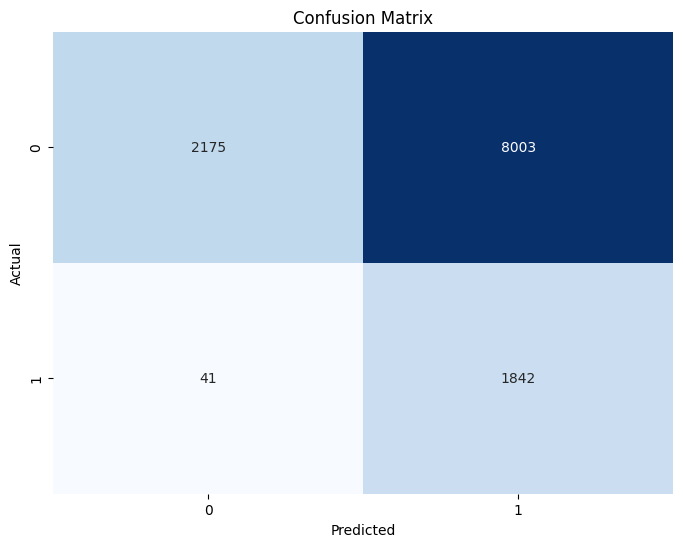


Conversion Rate (model prediction): 81.63%

Conversion Rate (Raw): 15.59%


In [ ]:
eval_classification2(grid_search_nb, X_4_train, y_4_train, X_4_test, y_4_test, X_4, y)

Conversion rate model lebih tinggi dibanding conversion rate raw data.

## XGBoost model 3

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

In [ ]:

xg_tuned = GridSearchCV(xg3, param_grid, cv=5, scoring='recall')
xg_tuned.fit(X_3_train,y_3_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'subsample': [0.5, 0.7, 1]},
             scoring='recall')

In [ ]:
# Tampilkan hasil terbaik
print("Best Hyperparameters:", xg_tuned.best_params_)
print("Best CV Score:", xg_tuned.best_score_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1}
Best CV Score: 0.6364361218606341


Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.90
Precision (Test Set): 0.76
Recall (Test Set): 0.59
F1-Score (Test Set): 0.66
ROC AUC (Test Set): 0.92
ROC AUC (Train Set): 0.94

Confusion Matrix:
[[9830  348]
 [ 686 1197]]


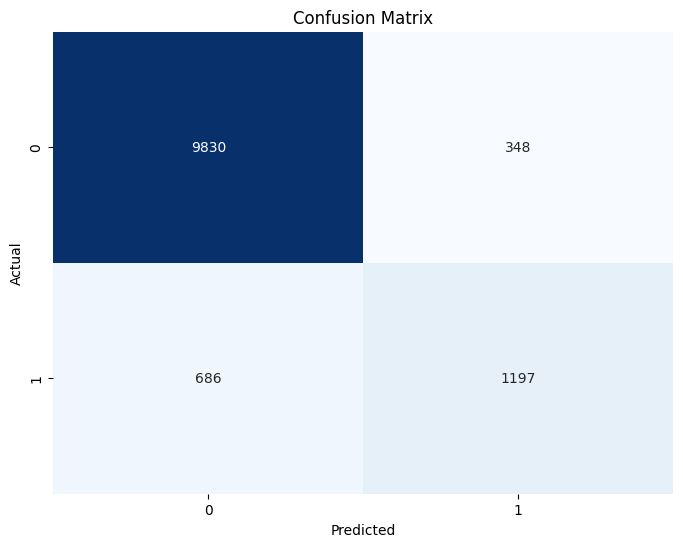


Conversion Rate (model prediction): 12.81%

Conversion Rate (Raw): 15.59%


In [ ]:
eval_classification2(xg_tuned, X_3_train, y_3_train, X_3_test, y_3_test, X, y)

# Feature Importance

## Naive bayes model 4

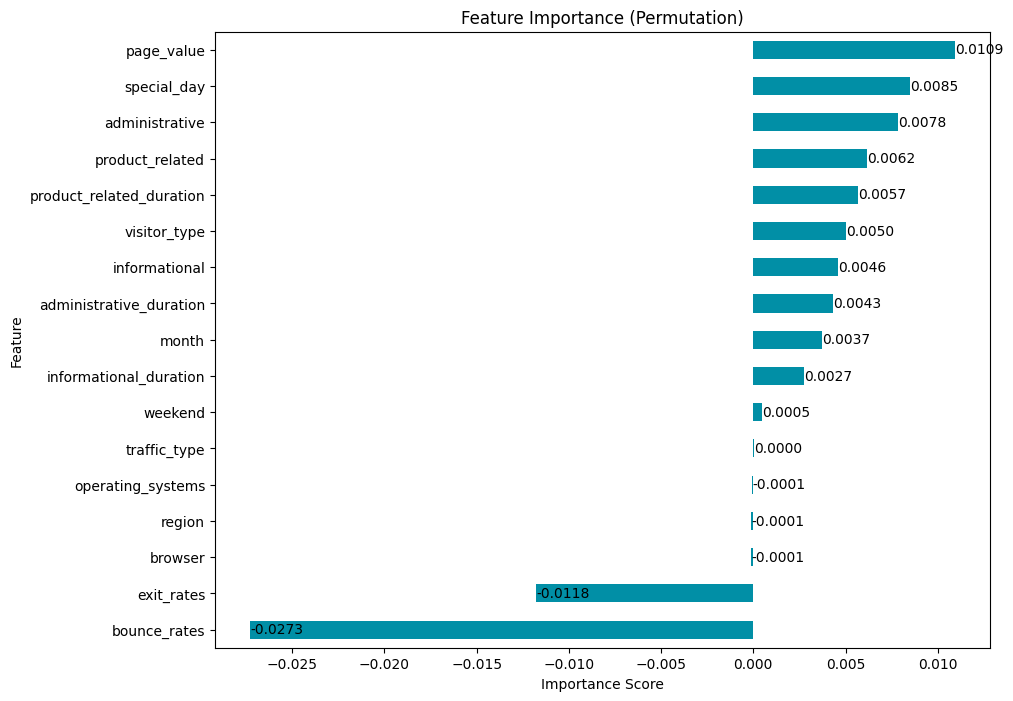

In [ ]:
show_feature_importance_NB(grid_search_nb.best_estimator_, X_4, y)

In [ ]:
X_4_2_test = X_4_test.drop(['bounce_rates','exit_rates','browser','region','operating_systems','traffic_type'], axis=1)
X_4_2_train = X_4_train.drop(['bounce_rates','exit_rates','browser','region','operating_systems','traffic_type'], axis=1)
y_4_2_test = y_4_test
y_4_2_train = y_4_train
X_4_2 = X_4.drop(['bounce_rates','exit_rates','browser','region','operating_systems','traffic_type'], axis=1)
y_4_2 = y

In [ ]:
# Lakukan Grid Search
grid_search_nb2 = GridSearchCV(estimator=nb4, param_grid=param_grid_nb, cv=5, verbose=1, scoring='recall', n_jobs=-1)
grid_search_nb2.fit(X_4_2_train, y_4_2_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.4, 0.6], [0.5, 0.5], [0.3, 0.7],
                                    [0.2, 0.8], [0.1, 0.9]],
                         'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='recall', verbose=1)

Accuracy (Test Set): 0.36
Accuracy (Train Set): 0.35
Precision (Test Set): 0.20
Recall (Test Set): 0.97
F1-Score (Test Set): 0.33
ROC AUC (Test Set): 0.83
ROC AUC (Train Set): 0.82

Confusion Matrix:
[[2367 7811]
 [  36 1847]]


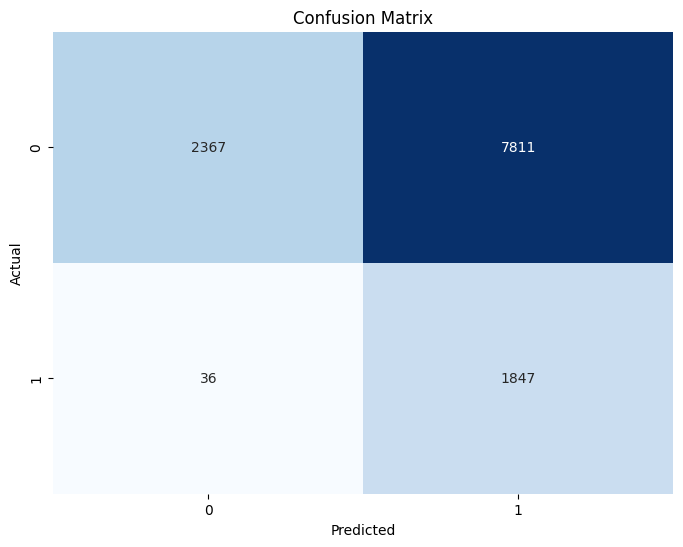


Conversion Rate (model prediction): 80.08%

Conversion Rate (Raw): 15.59%


In [ ]:
eval_classification2(grid_search_nb2, X_4_2_train, y_4_2_train, X_4_2_test, y_4_2_test, X_4_2, y)

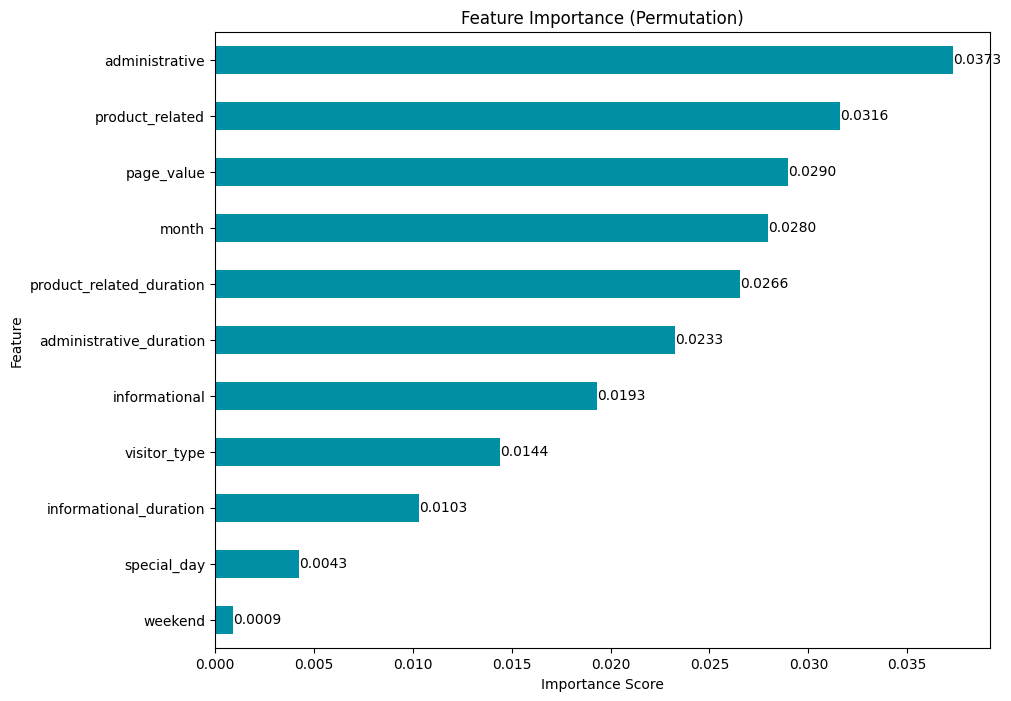

In [ ]:
show_feature_importance_NB(grid_search_nb2.best_estimator_, X_4_2, y)

## XGBoost model 3

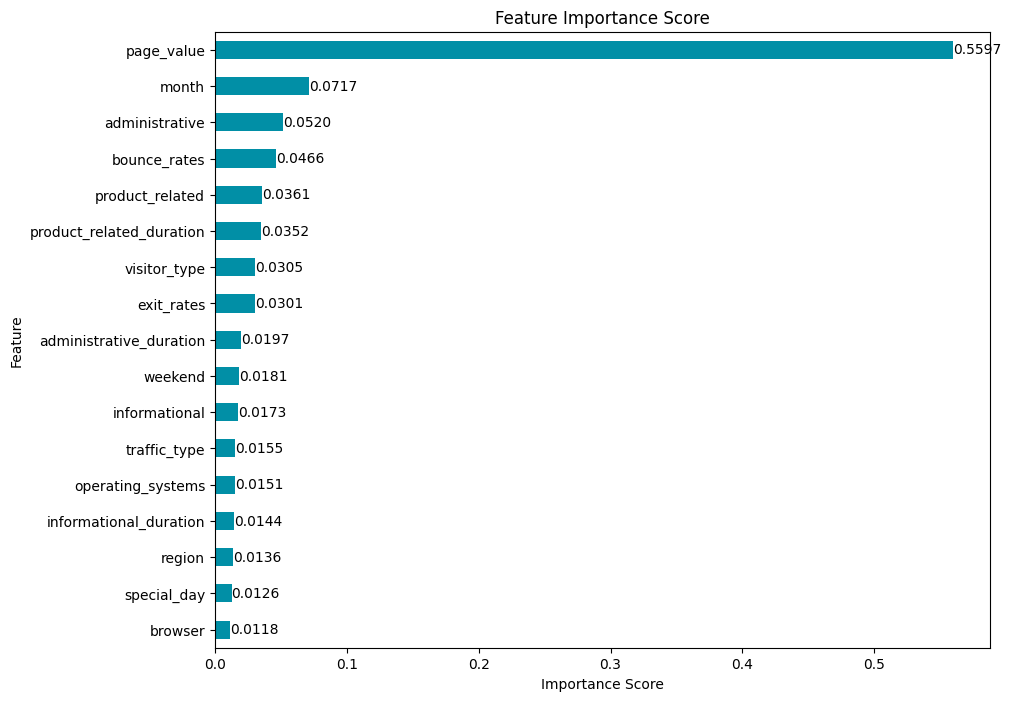

In [ ]:
show_feature_importance(xg_tuned.best_estimator_,X)

# Interpretasi akhir




**Fokus pada Fitur-Fitur Penting:**

**Administrative**, **Product Related**, dan **Page Value** adalah tiga fitur paling penting menurut grafik ini. Fitur-fitur ini memiliki dampak terbesar terhadap prediksi model.

**Pertimbangkan untuk fokus pada fitur-fitur ini untuk analisis lebih lanjut, perbaikan, atau feature engineering**.

**Optimisasi Fitur:**

Mengingat **Informational Duration**, **Special Day**, dan **Weekend** memiliki skor importance yang relatif rendah, Anda mungkin bisa mempertimbangkan untuk:

- Menghapus fitur-fitur ini untuk menyederhanakan model jika memang tidak berkontribusi secara signifikan terhadap prediksi.

- Mengevaluasi mengapa fitur-fitur ini memiliki importance yang rendah. Hal ini bisa disebabkan oleh kurangnya korelasi dengan variabel target, atau cara mereka di-encode atau direpresentasikan dalam model.


**Intervensi yang Terarah:**

Untuk fitur-fitur seperti **Visitor Type** dan **Month** yang memiliki importance sedang, Anda bisa mempertimbangkan strategi yang lebih spesifik. Misalnya:

- Menyesuaikan upaya marketing berdasarkan tipe pengunjung.
Menyesuaikan strategi berdasarkan tren musiman yang teramati melalui fitur bulan.
